In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


# ***1. Apples Dataset***

In [ ]:
df_apples=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - Apples.csv')

In [ ]:
df_apples

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,Apples (1kg),4.48,4.48,NaN,$,2.2-6.61,2020-02-09
1,United States,USA,Apples (1kg),4.48,4.65,3.79,$,2.2-8.82,2020-04-05
2,United States,USA,Apples (1kg),4.48,4.65,3.79,$,2.2-8.82,2020-04-12
3,United States,USA,Apples (1kg),4.48,4.65,3.79,$,2.2-8.82,2020-04-19
4,United States,USA,Apples (1kg),4.48,4.64,3.67,$,2.2-8.82,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,Apples (1kg),4.48,4.98,11.20,$,1.00-4.00,2023-07-16
171,United States,USA,Apples (1kg),4.48,5.27,17.63,$,1.00-4.00,2023-07-23
172,United States,USA,Apples (1kg),4.48,5.27,17.63,$,1.00-4.00,2023-07-30
173,United States,USA,Apples (1kg),4.48,5.29,18.02,$,1.00-4.00,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               173 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_apples.describe(include='all')
print(stats)

              Country ISO3       Product  Baseline (14 Feb 2020)  \
count             175  175           175            1.750000e+02   
unique              1    1             1                     NaN   
top     United States  USA  Apples (1kg)                     NaN   
freq              175  175           175                     NaN   
mean              NaN  NaN           NaN            4.480000e+00   
std               NaN  NaN           NaN            1.781454e-15   
min               NaN  NaN           NaN            4.480000e+00   
25%               NaN  NaN           NaN            4.480000e+00   
50%               NaN  NaN           NaN            4.480000e+00   
75%               NaN  NaN           NaN            4.480000e+00   
max               NaN  NaN           NaN            4.480000e+00   

        Price (Latest date)   Variation Currency     Range Latest date  
count            174.000000  173.000000      174       174         175  
unique                  NaN         N

(array([4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4]),
 [Text(4.4, 0, '4.4'),
  Text(4.5, 0, '4.5'),
  Text(4.6000000000000005, 0, '4.6'),
  Text(4.7, 0, '4.7'),
  Text(4.800000000000001, 0, '4.8'),
  Text(4.9, 0, '4.9'),
  Text(5.0, 0, '5.0'),
  Text(5.1000000000000005, 0, '5.1'),
  Text(5.2, 0, '5.2'),
  Text(5.300000000000001, 0, '5.3'),
  Text(5.4, 0, '5.4')])

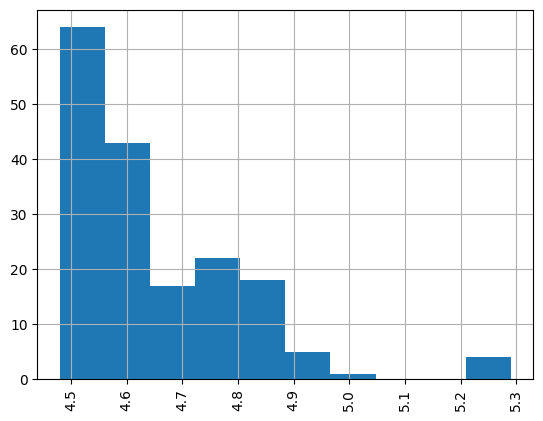

In [ ]:
df_apples['Price (Latest date)'].hist()
plt.xticks(rotation=90)

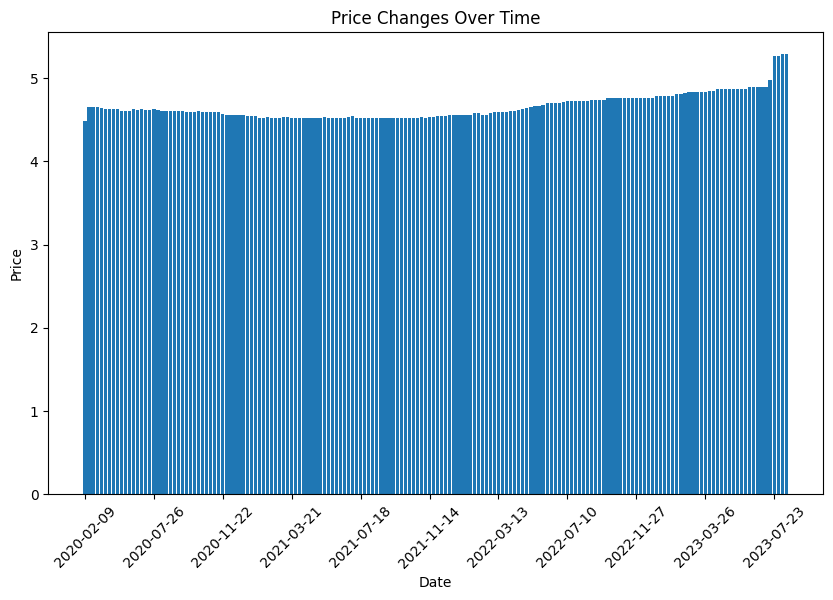

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_apples['Latest date'], df_apples['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

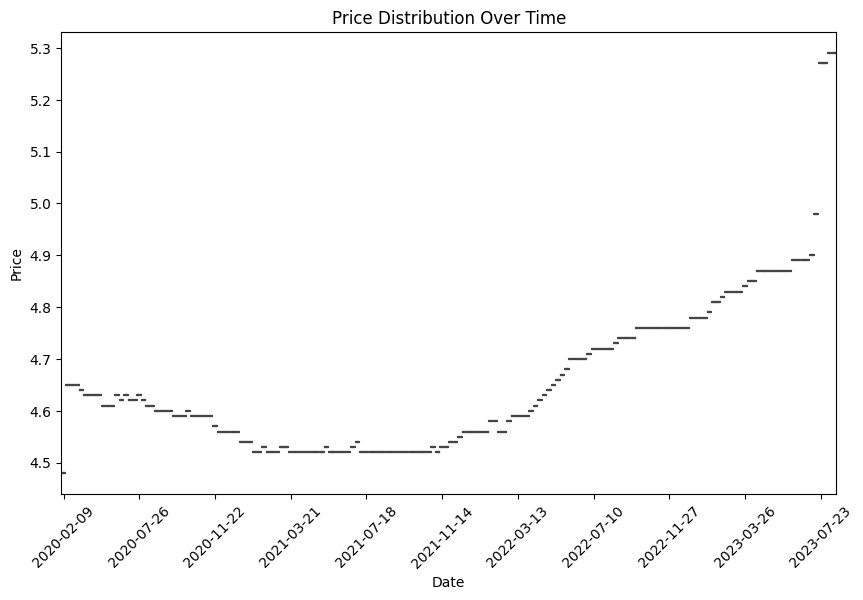

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_apples['Latest date'], y=df_apples['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_apples = df_apples.drop(columns=columns_to_drop)

In [ ]:
df_apples

,Country,Product,Price (Latest date),Latest date
0,United States,Apples (1kg),4.48,2020-02-09
1,United States,Apples (1kg),4.65,2020-04-05
2,United States,Apples (1kg),4.65,2020-04-12
3,United States,Apples (1kg),4.65,2020-04-19
4,United States,Apples (1kg),4.64,2020-04-26
...,...,...,...,...
170,United States,Apples (1kg),4.98,2023-07-16
171,United States,Apples (1kg),5.27,2023-07-23
172,United States,Apples (1kg),5.27,2023-07-30
173,United States,Apples (1kg),5.29,2023-08-06


In [ ]:
df_apples.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_apples.fillna(method='ffill',inplace=True)

In [ ]:
df_apples.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_apples = df_apples.iloc[1:]
df_apples

,Country,Product,Price (Latest date),Latest date
1,United States,Apples (1kg),4.65,2020-04-05
2,United States,Apples (1kg),4.65,2020-04-12
3,United States,Apples (1kg),4.65,2020-04-19
4,United States,Apples (1kg),4.64,2020-04-26
5,United States,Apples (1kg),4.63,2020-05-03
...,...,...,...,...
170,United States,Apples (1kg),4.98,2023-07-16
171,United States,Apples (1kg),5.27,2023-07-23
172,United States,Apples (1kg),5.27,2023-07-30
173,United States,Apples (1kg),5.29,2023-08-06


In [ ]:
for i in range(1, 4):
    df_apples[f'Price {i} week(s) ago'] = df_apples['Price (Latest date)'].shift(i)

<ipython-input-16-3199c4f8ea8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apples[f'Price {i} week(s) ago'] = df_apples['Price (Latest date)'].shift(i)
<ipython-input-16-3199c4f8ea8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apples[f'Price {i} week(s) ago'] = df_apples['Price (Latest date)'].shift(i)
<ipython-input-16-3199c4f8ea8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
df_apples

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,Apples (1kg),4.65,2020-04-05,NaN,NaN,NaN
2,United States,Apples (1kg),4.65,2020-04-12,4.65,NaN,NaN
3,United States,Apples (1kg),4.65,2020-04-19,4.65,4.65,NaN
4,United States,Apples (1kg),4.64,2020-04-26,4.65,4.65,4.65
5,United States,Apples (1kg),4.63,2020-05-03,4.64,4.65,4.65
...,...,...,...,...,...,...,...
170,United States,Apples (1kg),4.98,2023-07-16,4.90,4.89,4.89
171,United States,Apples (1kg),5.27,2023-07-23,4.98,4.90,4.89
172,United States,Apples (1kg),5.27,2023-07-30,5.27,4.98,4.90
173,United States,Apples (1kg),5.29,2023-08-06,5.27,5.27,4.98


In [ ]:
df_apples = df_apples.dropna().reset_index(drop=True)

In [ ]:
df_apples

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,Apples (1kg),4.64,2020-04-26,4.65,4.65,4.65
1,United States,Apples (1kg),4.63,2020-05-03,4.64,4.65,4.65
2,United States,Apples (1kg),4.63,2020-05-10,4.63,4.64,4.65
3,United States,Apples (1kg),4.63,2020-05-17,4.63,4.63,4.64
4,United States,Apples (1kg),4.63,2020-05-24,4.63,4.63,4.63
...,...,...,...,...,...,...,...
166,United States,Apples (1kg),4.98,2023-07-16,4.90,4.89,4.89
167,United States,Apples (1kg),5.27,2023-07-23,4.98,4.90,4.89
168,United States,Apples (1kg),5.27,2023-07-30,5.27,4.98,4.90
169,United States,Apples (1kg),5.29,2023-08-06,5.27,5.27,4.98


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_apples[df_apples.columns[4:]],  df_apples['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
128,4.76,4.76,4.74
93,4.56,4.56,4.56
143,4.79,4.78,4.78
45,4.52,4.52,4.52
125,4.74,4.74,4.74
...,...,...,...
170,5.29,5.27,5.27
81,4.53,4.52,4.52
78,4.52,4.52,4.52
127,4.76,4.74,4.74


In [ ]:
Y_train

128    4.76
93     4.58
143    4.81
45     4.53
125    4.74
       ... 
170    5.29
81     4.52
78     4.52
127    4.76
138    4.78
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9749567992445145


In [ ]:
model.coef_

array([ 0.18090992, -0.03088877,  0.00877756])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 4.660882352941176


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([4.90246747, 4.5282375 , 4.51852474, 4.56003206, 4.68539658,
       4.62012234, 4.54012095, 4.88171381, 4.63351243, 4.51852474,
       4.83954241, 4.63568313, 4.72539728, 4.60153939, 4.76756867,
       4.83133628, 4.76756867, 4.78832233, 4.63333395, 4.65426609,
       4.51985289, 4.54060655, 4.74681501, 4.55116186, 4.51484741,
       4.56003206, 4.51852474, 4.51852474, 4.8618027 , 4.6231356 ,
       4.55936799, 4.61275877, 4.59116255, 4.61258029, 4.60003276])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.006521052968185259
Mean Squared Error: 6.770187936998481e-05
Root Mean Squared Error: 0.008228115177243499
R-squared: 0.9950202467679273


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.00828571428571416
Mean Squared Error: 0.00016564285714285756
Root Mean Squared Error: 0.012870231433150593
R-squared: 0.9878162827841291


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            41600     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 2s 54ms/step - loss: 21.6601 - mean_absolute_error: 4.6514 - val_loss: 21.3738 - val_mean_absolute_error: 4.6204
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 21.3886 - mean_absolute_error: 4.6223 - val_loss: 21.0688 - val_mean_absolute_error: 4.5876
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 21.0626 - mean_absolute_error: 4.5870 - val_loss: 20.6616 - val_mean_absolute_error: 4.5433
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 20.6202 - mean_absolute_error: 4.5387 - val_loss: 20.0848 - val_mean_absolute_error: 4.4798
Epoch 5/200
7/7 [==============================] - 0s 8ms/step - loss: 20.0016 - mean_absolute_error: 4.4701 - val_loss: 19.2530 - val_mean_absolute_error: 4.3859
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 19.1270 - mean_absolute_error: 4.3711 - val_loss: 18.0558 - val_mean_absolute_error: 4.2433
Epoch 7/200
7/7 [===

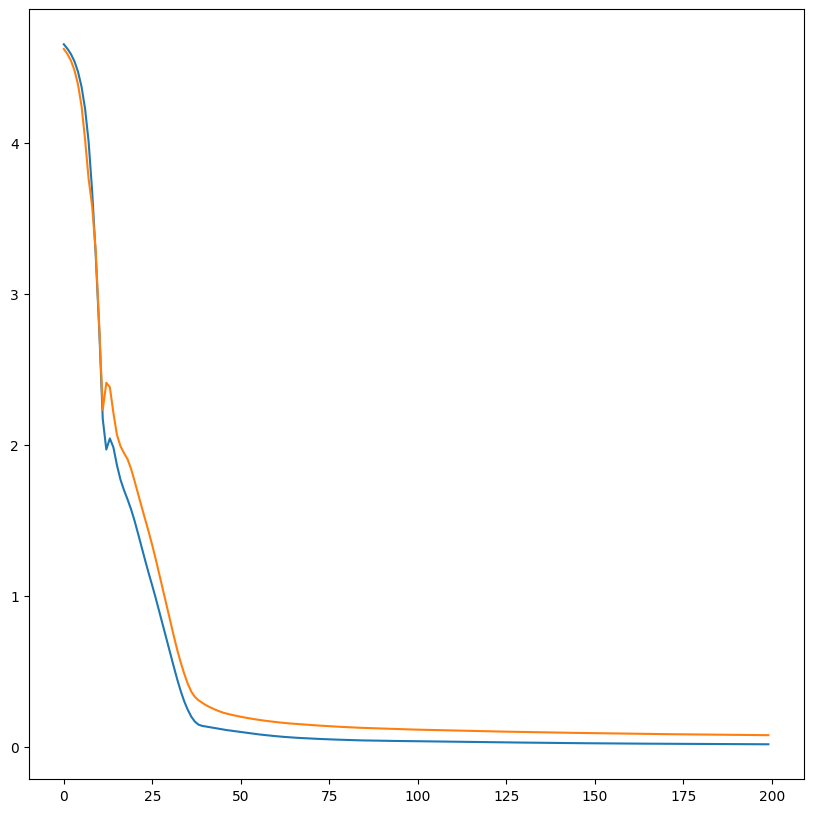

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 5ms/step


In [ ]:
y_pred

array([[4.9880295],
       [4.5159383],
       [4.531807 ],
       [4.535858 ],
       [4.6922326],
       [4.639225 ],
       [4.507347 ],
       [4.878902 ],
       [4.6110544],
       [4.531807 ],
       [4.837826 ],
       [4.6040983],
       [4.700401 ],
       [4.5943356],
       [4.775975 ],
       [4.8313646],
       [4.775975 ],
       [4.8145094],
       [4.6676636],
       [4.6468706],
       [4.5265827],
       [4.537357 ],
       [4.7442174],
       [4.513244 ],
       [4.5311675],
       [4.535858 ],
       [4.531807 ],
       [4.531807 ],
       [4.827514 ],
       [4.5928993],
       [4.525662 ],
       [4.574604 ],
       [4.5752764],
       [4.629584 ],
       [4.6177936]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.021031086512974285
Mean Squared Error: 0.0007157868872039452
Root Mean Squared Error: 0.026754193824594028
R-squared: 0.9473509140632607


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9950202467679273
R-squared decision tree regressor:  0.9878162827841291
R-squared neural networkk:  0.9473509140632607


#***2. Bananas Dataset***

In [ ]:
df_bananas=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - Bananas.csv')

In [ ]:
df_bananas

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,Bananas (1kg),1.53,1.53,NaN,$,1.08-2.2,2020-02-09
1,United States,USA,Bananas (1kg),1.53,1.59,3.92,$,0.88-3.31,2020-04-05
2,United States,USA,Bananas (1kg),1.53,1.59,3.92,$,0.86-3.31,2020-04-12
3,United States,USA,Bananas (1kg),1.53,1.59,3.92,$,0.99-3.31,2020-04-19
4,United States,USA,Bananas (1kg),1.53,1.59,3.92,$,0.99-3.31,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,Bananas (1kg),1.53,1.61,5.23,$,0.49-2.05,2023-07-16
171,United States,USA,Bananas (1kg),1.53,1.61,5.23,$,0.49-2.01,2023-07-23
172,United States,USA,Bananas (1kg),1.53,1.61,5.23,$,0.49-2.01,2023-07-30
173,United States,USA,Bananas (1kg),1.53,1.61,5.23,$,0.49-2.01,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_bananas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               173 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_bananas.describe(include='all')
print(stats)

              Country ISO3        Product  Baseline (14 Feb 2020)  \
count             175  175            175                  175.00   
unique              1    1              1                     NaN   
top     United States  USA  Bananas (1kg)                     NaN   
freq              175  175            175                     NaN   
mean              NaN  NaN            NaN                    1.53   
std               NaN  NaN            NaN                    0.00   
min               NaN  NaN            NaN                    1.53   
25%               NaN  NaN            NaN                    1.53   
50%               NaN  NaN            NaN                    1.53   
75%               NaN  NaN            NaN                    1.53   
max               NaN  NaN            NaN                    1.53   

        Price (Latest date)   Variation Currency      Range Latest date  
count            174.000000  173.000000      174        174         175  
unique                 

(array([1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62]),
 [Text(1.52, 0, '1.52'),
  Text(1.53, 0, '1.53'),
  Text(1.54, 0, '1.54'),
  Text(1.55, 0, '1.55'),
  Text(1.56, 0, '1.56'),
  Text(1.57, 0, '1.57'),
  Text(1.58, 0, '1.58'),
  Text(1.59, 0, '1.59'),
  Text(1.6, 0, '1.60'),
  Text(1.61, 0, '1.61'),
  Text(1.62, 0, '1.62')])

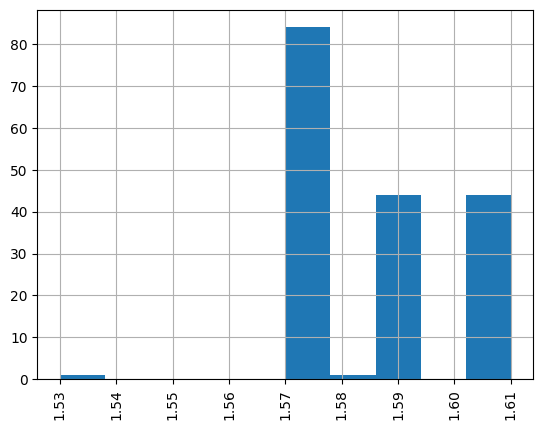

In [ ]:
df_bananas['Price (Latest date)'].hist()
plt.xticks(rotation=90)

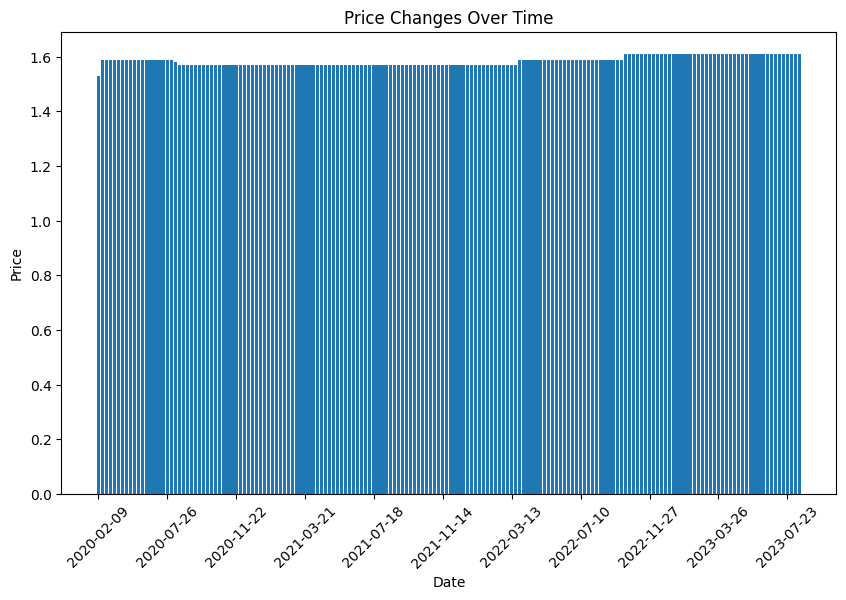

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_bananas['Latest date'], df_bananas['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

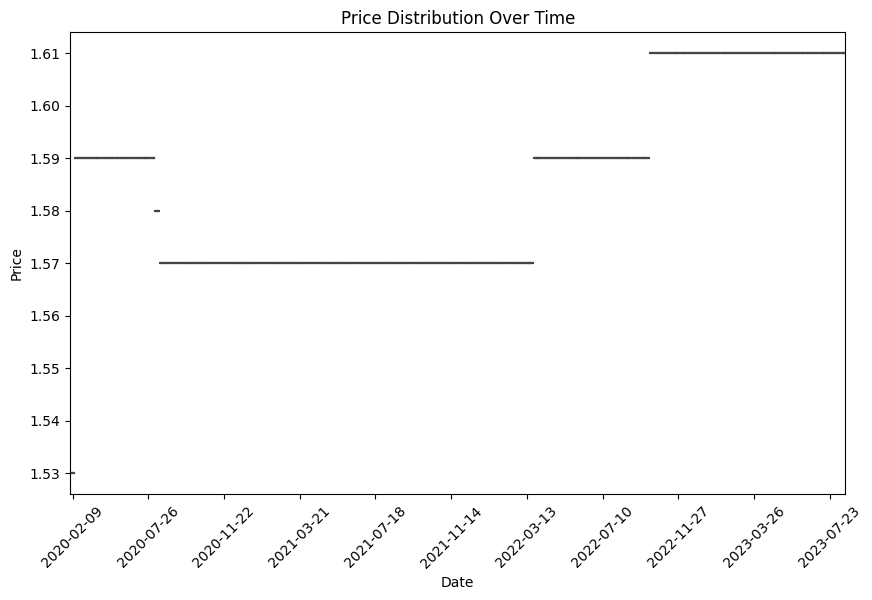

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_bananas['Latest date'], y=df_bananas['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_bananas = df_bananas.drop(columns=columns_to_drop)

In [ ]:
df_bananas

,Country,Product,Price (Latest date),Latest date
0,United States,Bananas (1kg),1.53,2020-02-09
1,United States,Bananas (1kg),1.59,2020-04-05
2,United States,Bananas (1kg),1.59,2020-04-12
3,United States,Bananas (1kg),1.59,2020-04-19
4,United States,Bananas (1kg),1.59,2020-04-26
...,...,...,...,...
170,United States,Bananas (1kg),1.61,2023-07-16
171,United States,Bananas (1kg),1.61,2023-07-23
172,United States,Bananas (1kg),1.61,2023-07-30
173,United States,Bananas (1kg),1.61,2023-08-06


In [ ]:
df_bananas.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_bananas.fillna(method='ffill',inplace=True)

In [ ]:
df_bananas.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_bananas = df_bananas.iloc[1:]
df_bananas

,Country,Product,Price (Latest date),Latest date
1,United States,Bananas (1kg),1.59,2020-04-05
2,United States,Bananas (1kg),1.59,2020-04-12
3,United States,Bananas (1kg),1.59,2020-04-19
4,United States,Bananas (1kg),1.59,2020-04-26
5,United States,Bananas (1kg),1.59,2020-05-03
...,...,...,...,...
170,United States,Bananas (1kg),1.61,2023-07-16
171,United States,Bananas (1kg),1.61,2023-07-23
172,United States,Bananas (1kg),1.61,2023-07-30
173,United States,Bananas (1kg),1.61,2023-08-06


In [ ]:
for i in range(1, 4):
    df_bananas[f'Price {i} week(s) ago'] = df_bananas['Price (Latest date)'].shift(i)

<ipython-input-62-f380da5ca1ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bananas[f'Price {i} week(s) ago'] = df_bananas['Price (Latest date)'].shift(i)
<ipython-input-62-f380da5ca1ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bananas[f'Price {i} week(s) ago'] = df_bananas['Price (Latest date)'].shift(i)
<ipython-input-62-f380da5ca1ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
df_bananas

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,Bananas (1kg),1.59,2020-04-05,NaN,NaN,NaN
2,United States,Bananas (1kg),1.59,2020-04-12,1.59,NaN,NaN
3,United States,Bananas (1kg),1.59,2020-04-19,1.59,1.59,NaN
4,United States,Bananas (1kg),1.59,2020-04-26,1.59,1.59,1.59
5,United States,Bananas (1kg),1.59,2020-05-03,1.59,1.59,1.59
...,...,...,...,...,...,...,...
170,United States,Bananas (1kg),1.61,2023-07-16,1.61,1.61,1.61
171,United States,Bananas (1kg),1.61,2023-07-23,1.61,1.61,1.61
172,United States,Bananas (1kg),1.61,2023-07-30,1.61,1.61,1.61
173,United States,Bananas (1kg),1.61,2023-08-06,1.61,1.61,1.61


In [ ]:
df_bananas = df_bananas.dropna().reset_index(drop=True)

In [ ]:
df_bananas

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,Bananas (1kg),1.59,2020-04-26,1.59,1.59,1.59
1,United States,Bananas (1kg),1.59,2020-05-03,1.59,1.59,1.59
2,United States,Bananas (1kg),1.59,2020-05-10,1.59,1.59,1.59
3,United States,Bananas (1kg),1.59,2020-05-17,1.59,1.59,1.59
4,United States,Bananas (1kg),1.59,2020-05-24,1.59,1.59,1.59
...,...,...,...,...,...,...,...
166,United States,Bananas (1kg),1.61,2023-07-16,1.61,1.61,1.61
167,United States,Bananas (1kg),1.61,2023-07-23,1.61,1.61,1.61
168,United States,Bananas (1kg),1.61,2023-07-30,1.61,1.61,1.61
169,United States,Bananas (1kg),1.61,2023-08-06,1.61,1.61,1.61


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_bananas[df_bananas.columns[4:]],  df_bananas['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
153,1.61,1.61,1.61
168,1.61,1.61,1.61
128,1.61,1.59,1.59
78,1.57,1.57,1.57
13,1.59,1.59,1.59
...,...,...,...
138,1.61,1.61,1.61
4,1.59,1.59,1.59
163,1.61,1.61,1.61
5,1.59,1.59,1.59


In [ ]:
Y_train

153    1.61
168    1.61
128    1.61
78     1.57
13     1.59
       ... 
138    1.61
4      1.59
163    1.61
5      1.59
82     1.57
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9765878519234202


In [ ]:
model.coef_

array([ 0.01810076, -0.00180997,  0.00013882])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 1.5858823529411763


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([1.57030909, 1.57030909, 1.57030909, 1.61004801, 1.61004801,
       1.61004801, 1.57030909, 1.57030909, 1.57030909, 1.57030909,
       1.57030909, 1.59017855, 1.57030909, 1.57030909, 1.57030909,
       1.57030909, 1.59017855, 1.57030909, 1.57030909, 1.57030909,
       1.61004801, 1.61004801, 1.59017855, 1.57030909, 1.57030909,
       1.57030909, 1.57030909, 1.57030909, 1.61004801, 1.57030909,
       1.59017855, 1.61004801, 1.59017855, 1.59017855, 1.61004801])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.0005127502584128989
Mean Squared Error: 3.0224850532982464e-06
Root Mean Squared Error: 0.0017385295664147464
R-squared: 0.9890001658042473


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.0005801030089444531
Mean Squared Error: 3.315030119289025e-06
Root Mean Squared Error: 0.0018207224168689266
R-squared: 0.9879354964464377


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 100)            41600     
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 2s 51ms/step - loss: 2.4661 - mean_absolute_error: 1.5703 - val_loss: 2.4323 - val_mean_absolute_error: 1.5595
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 2.3674 - mean_absolute_error: 1.5385 - val_loss: 2.3224 - val_mean_absolute_error: 1.5238
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 2.2454 - mean_absolute_error: 1.4982 - val_loss: 2.1795 - val_mean_absolute_error: 1.4760
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 2.0846 - mean_absolute_error: 1.4432 - val_loss: 1.9883 - val_mean_absolute_error: 1.4091
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 1.8696 - mean_absolute_error: 1.3658 - val_loss: 1.7329 - val_mean_absolute_error: 1.3136
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 1.5844 - mean_absolute_error: 1.2546 - val_loss: 1.4001 - val_mean_absolute_error: 1.1745
Epoch 7/200
7/7 [==============

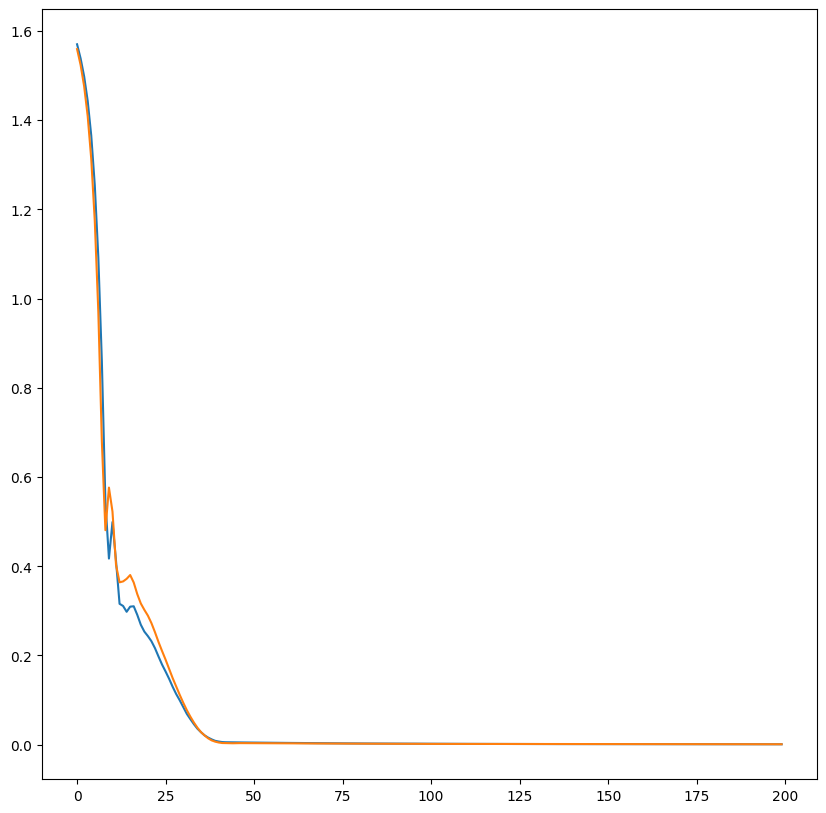

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 5ms/step


In [ ]:
y_pred

array([[1.5700347],
       [1.5700347],
       [1.5700347],
       [1.6102031],
       [1.6102031],
       [1.6102031],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.589255 ],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.589255 ],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.6102031],
       [1.6102031],
       [1.589255 ],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.5700347],
       [1.6102031],
       [1.5700347],
       [1.589255 ],
       [1.6102031],
       [1.589255 ],
       [1.589255 ],
       [1.6102031]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.00043813896179194196
Mean Squared Error: 2.5367249743755375e-06
Root Mean Squared Error: 0.00159270994671834
R-squared: 0.9907680092287284


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9890001658042473
R-squared decision tree regressor:  0.9879354964464377
R-squared neural networkk:  0.9907680092287284


#***3. Meat Of Cattle Dataset***

In [ ]:
df_cattle=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - MeatOfCattle.csv')

In [ ]:
df_cattle

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,11.49,NaN,$,6.93-17.64,2020-02-09
1,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,11.95,4.00,$,6.59-19.84,2020-04-05
2,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,11.94,3.88,$,6.59-19.84,2020-04-12
3,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,11.94,3.90,$,6.61-19.84,2020-04-19
4,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,11.99,4.33,$,6.61-19.84,2020-04-26
...,...,...,...,...,...,...,...,...,...
137,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,14.95,30.11,$,8.8-24.25,2022-11-27
138,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,14.95,30.11,$,8.8-24.25,2022-12-04
139,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,14.95,30.14,$,8.8-24.25,2022-12-11
140,United States,USA,"Meat of cattle, fresh or chilled (1kg)",11.49,14.96,30.16,$,8.8-24.25,2022-12-18


# Data Analysis and Visualization

In [ ]:
df_cattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 142 non-null    object 
 1   ISO3                    142 non-null    object 
 2   Product                 142 non-null    object 
 3   Baseline (14 Feb 2020)  142 non-null    float64
 4   Price (Latest date)     141 non-null    float64
 5   Variation               140 non-null    float64
 6   Currency                141 non-null    object 
 7   Range                   141 non-null    object 
 8   Latest date             142 non-null    object 
dtypes: float64(3), object(6)
memory usage: 10.1+ KB


In [ ]:
stats = df_cattle.describe(include='all')
print(stats)

              Country ISO3                                 Product  \
count             142  142                                     142   
unique              1    1                                       1   
top     United States  USA  Meat of cattle, fresh or chilled (1kg)   
freq              142  142                                     142   
mean              NaN  NaN                                     NaN   
std               NaN  NaN                                     NaN   
min               NaN  NaN                                     NaN   
25%               NaN  NaN                                     NaN   
50%               NaN  NaN                                     NaN   
75%               NaN  NaN                                     NaN   
max               NaN  NaN                                     NaN   

        Baseline (14 Feb 2020)  Price (Latest date)   Variation Currency  \
count                   142.00           141.000000  140.000000      141   
unique 

(array([11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5]),
 [Text(11.0, 0, '11.0'),
  Text(11.5, 0, '11.5'),
  Text(12.0, 0, '12.0'),
  Text(12.5, 0, '12.5'),
  Text(13.0, 0, '13.0'),
  Text(13.5, 0, '13.5'),
  Text(14.0, 0, '14.0'),
  Text(14.5, 0, '14.5'),
  Text(15.0, 0, '15.0'),
  Text(15.5, 0, '15.5')])

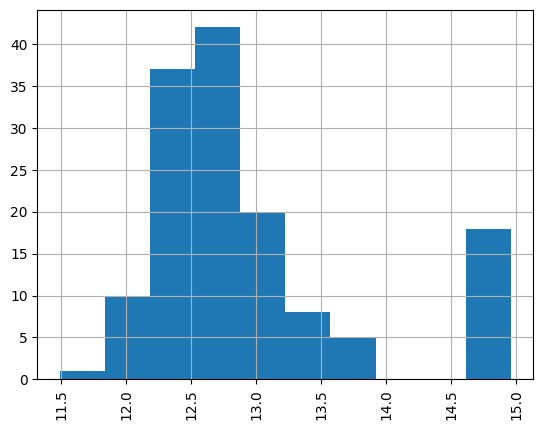

In [ ]:
df_cattle['Price (Latest date)'].hist()
plt.xticks(rotation=90)

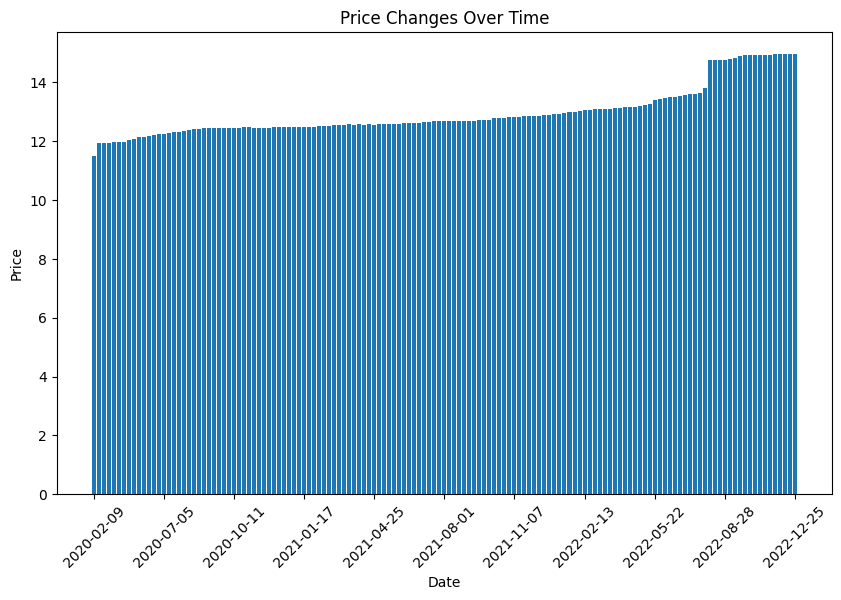

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_cattle['Latest date'], df_cattle['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

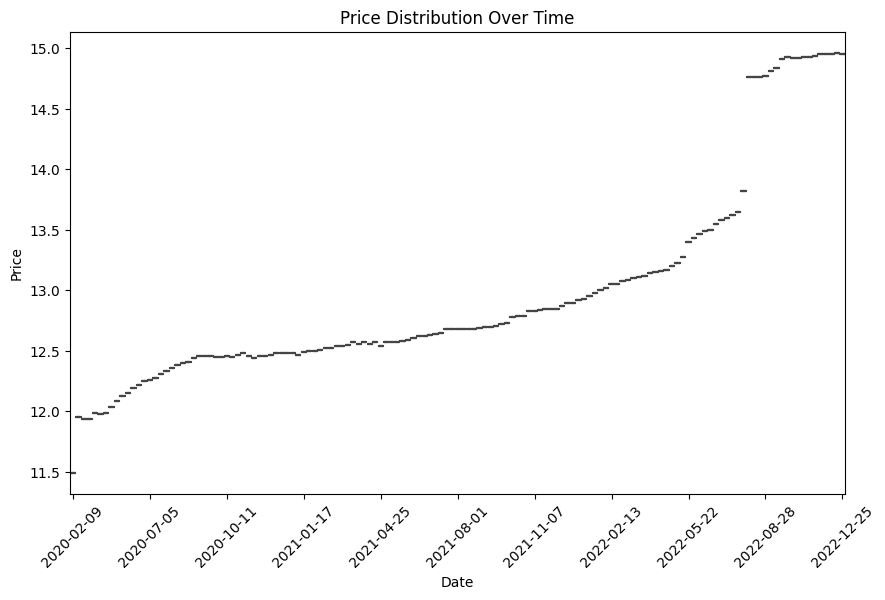

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cattle['Latest date'], y=df_cattle['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_cattle = df_cattle.drop(columns=columns_to_drop)

In [ ]:
df_cattle

,Country,Product,Price (Latest date),Latest date
0,United States,"Meat of cattle, fresh or chilled (1kg)",11.49,2020-02-09
1,United States,"Meat of cattle, fresh or chilled (1kg)",11.95,2020-04-05
2,United States,"Meat of cattle, fresh or chilled (1kg)",11.94,2020-04-12
3,United States,"Meat of cattle, fresh or chilled (1kg)",11.94,2020-04-19
4,United States,"Meat of cattle, fresh or chilled (1kg)",11.99,2020-04-26
...,...,...,...,...
137,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-11-27
138,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-12-04
139,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-12-11
140,United States,"Meat of cattle, fresh or chilled (1kg)",14.96,2022-12-18


In [ ]:
df_cattle.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_cattle.fillna(method='ffill',inplace=True)

In [ ]:
df_cattle.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_cattle = df_cattle.iloc[1:]
df_cattle

,Country,Product,Price (Latest date),Latest date
1,United States,"Meat of cattle, fresh or chilled (1kg)",11.95,2020-04-05
2,United States,"Meat of cattle, fresh or chilled (1kg)",11.94,2020-04-12
3,United States,"Meat of cattle, fresh or chilled (1kg)",11.94,2020-04-19
4,United States,"Meat of cattle, fresh or chilled (1kg)",11.99,2020-04-26
5,United States,"Meat of cattle, fresh or chilled (1kg)",11.98,2020-05-03
...,...,...,...,...
137,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-11-27
138,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-12-04
139,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-12-11
140,United States,"Meat of cattle, fresh or chilled (1kg)",14.96,2022-12-18


In [ ]:
for i in range(1, 4):
    df_cattle[f'Price {i} week(s) ago'] = df_cattle['Price (Latest date)'].shift(i)

<ipython-input-105-3e31e3cc0ba4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cattle[f'Price {i} week(s) ago'] = df_cattle['Price (Latest date)'].shift(i)
<ipython-input-105-3e31e3cc0ba4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cattle[f'Price {i} week(s) ago'] = df_cattle['Price (Latest date)'].shift(i)
<ipython-input-105-3e31e3cc0ba4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
df_cattle

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,"Meat of cattle, fresh or chilled (1kg)",11.95,2020-04-05,NaN,NaN,NaN
2,United States,"Meat of cattle, fresh or chilled (1kg)",11.94,2020-04-12,11.95,NaN,NaN
3,United States,"Meat of cattle, fresh or chilled (1kg)",11.94,2020-04-19,11.94,11.95,NaN
4,United States,"Meat of cattle, fresh or chilled (1kg)",11.99,2020-04-26,11.94,11.94,11.95
5,United States,"Meat of cattle, fresh or chilled (1kg)",11.98,2020-05-03,11.99,11.94,11.94
...,...,...,...,...,...,...,...
137,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-11-27,14.94,14.93,14.93
138,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-12-04,14.95,14.94,14.93
139,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-12-11,14.95,14.95,14.94
140,United States,"Meat of cattle, fresh or chilled (1kg)",14.96,2022-12-18,14.95,14.95,14.95


In [ ]:
df_cattle = df_cattle.dropna().reset_index(drop=True)

In [ ]:
df_cattle

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,"Meat of cattle, fresh or chilled (1kg)",11.99,2020-04-26,11.94,11.94,11.95
1,United States,"Meat of cattle, fresh or chilled (1kg)",11.98,2020-05-03,11.99,11.94,11.94
2,United States,"Meat of cattle, fresh or chilled (1kg)",11.99,2020-05-10,11.98,11.99,11.94
3,United States,"Meat of cattle, fresh or chilled (1kg)",12.04,2020-05-17,11.99,11.98,11.99
4,United States,"Meat of cattle, fresh or chilled (1kg)",12.09,2020-05-24,12.04,11.99,11.98
...,...,...,...,...,...,...,...
133,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-11-27,14.94,14.93,14.93
134,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-12-04,14.95,14.94,14.93
135,United States,"Meat of cattle, fresh or chilled (1kg)",14.95,2022-12-11,14.95,14.95,14.94
136,United States,"Meat of cattle, fresh or chilled (1kg)",14.96,2022-12-18,14.95,14.95,14.95


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_cattle[df_cattle.columns[4:]],  df_cattle['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
71,12.68,12.68,12.68
116,13.58,13.55,13.50
73,12.70,12.69,12.68
83,12.84,12.83,12.83
99,13.09,13.08,13.05
...,...,...,...
125,14.81,14.77,14.76
35,12.48,12.48,12.47
65,12.65,12.64,12.63
13,12.31,12.28,12.26


In [ ]:
Y_train

71     12.69
116    13.60
73     12.70
83     12.85
99     13.10
       ...  
125    14.84
35     12.48
65     12.68
13     12.33
43     12.52
Name: Price (Latest date), Length: 110, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9874400339146934


In [ ]:
model.coef_

array([ 0.90457479, -0.24145408,  0.12652069])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 13.012090909090908


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([12.34343146, 12.49520829, 13.18414617, 12.51183605, 13.49860815,
       12.37692516, 12.58801803, 13.25454499, 12.4854504 , 12.14094604,
       12.97340225, 12.27118431, 12.49705661, 14.99326765, 12.23208192,
       13.30807788, 12.69919309, 12.86933524, 12.59119126, 14.99344212,
       11.98184677, 12.10201813, 12.80349827, 12.87083462, 12.00931915,
       14.64407028, 12.45945361, 14.98483468])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.02486986317243778
Mean Squared Error: 0.0012257720695548976
Root Mean Squared Error: 0.03501102782774161
R-squared: 0.9984600468448744


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.021190476190476076
Mean Squared Error: 0.0006753968253968203
Root Mean Squared Error: 0.025988397899770973
R-squared: 0.9991514903153167


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(110, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(110, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 100)            41600     
                                                                 
 lstm_5 (LSTM)               (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
6/6 [==============================] - 2s 60ms/step - loss: 170.1915 - mean_absolute_error: 13.0231 - val_loss: 167.3937 - val_mean_absolute_error: 12.9092
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 169.5617 - mean_absolute_error: 12.9994 - val_loss: 166.6583 - val_mean_absolute_error: 12.8813
Epoch 3/200
6/6 [==============================] - 0s 11ms/step - loss: 168.8341 - mean_absolute_error: 12.9719 - val_loss: 165.7486 - val_mean_absolute_error: 12.8467
Epoch 4/200
6/6 [==============================] - 0s 9ms/step - loss: 167.9257 - mean_absolute_error: 12.9377 - val_loss: 164.5582 - val_mean_absolute_error: 12.8014
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 166.7392 - mean_absolute_error: 12.8929 - val_loss: 162.9441 - val_mean_absolute_error: 12.7399
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 165.1424 - mean_absolute_error: 12.8326 - val_loss: 160.7095 - val_mean_absolute_error: 12.

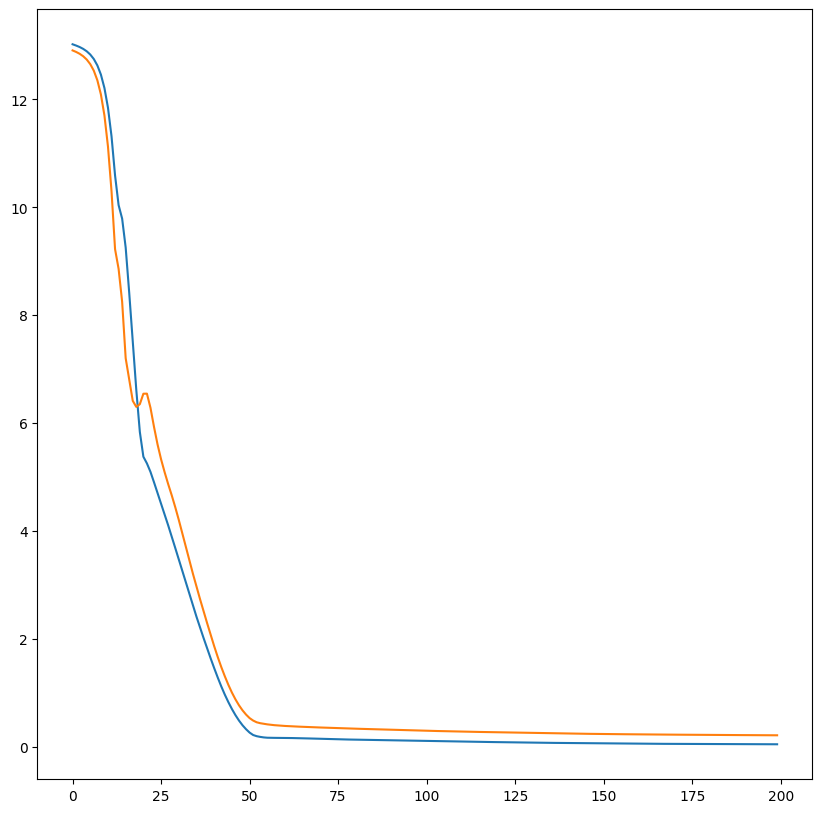

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


1/1 [==============================] - 0s 228ms/step


In [ ]:
y_pred

array([[12.315431],
       [12.462549],
       [13.213152],
       [12.49086 ],
       [13.372592],
       [12.345046],
       [12.574447],
       [13.230729],
       [12.47502 ],
       [12.495545],
       [13.051913],
       [12.255593],
       [12.481707],
       [14.943269],
       [12.228645],
       [13.243889],
       [12.662507],
       [12.931935],
       [12.577531],
       [14.939463],
       [13.430205],
       [12.832929],
       [12.796296],
       [12.925915],
       [13.550048],
       [14.958368],
       [12.411096],
       [14.937666]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.18395480837140754
Mean Squared Error: 0.18787821653773054
Root Mean Squared Error: 0.43344920871738885
R-squared: 0.7639661895366117


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9984600468448744
R-squared decision tree regressor:  0.9991514903153167
R-squared neural networkk:  0.7639661895366117


#***4. Meat Of Chickens Dataset***

In [ ]:
df_chicken=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - MeatOfChickens.csv')

In [ ]:
df_chicken

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,8.46,NaN,$,4.41-15.41,2020-02-09
1,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,8.81,4.18,$,4.39-16.31,2020-04-05
2,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,8.81,4.15,$,4.39-16.09,2020-04-12
3,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,8.82,4.29,$,4.39-16.31,2020-04-19
4,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,8.87,4.90,$,4.39-16.18,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,11.97,41.53,$,2.28-9.50,2023-07-16
171,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,11.99,41.73,$,2.28-9.75,2023-07-23
172,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,11.99,41.73,$,2.29-9.52,2023-07-30
173,United States,USA,"Meat of chickens, fresh or chilled (1kg)",8.46,11.99,41.73,$,2.29-9.52,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_chicken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               173 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_chicken.describe(include='all')
print(stats)

              Country ISO3                                   Product  \
count             175  175                                       175   
unique              1    1                                         1   
top     United States  USA  Meat of chickens, fresh or chilled (1kg)   
freq              175  175                                       175   
mean              NaN  NaN                                       NaN   
std               NaN  NaN                                       NaN   
min               NaN  NaN                                       NaN   
25%               NaN  NaN                                       NaN   
50%               NaN  NaN                                       NaN   
75%               NaN  NaN                                       NaN   
max               NaN  NaN                                       NaN   

        Baseline (14 Feb 2020)  Price (Latest date)   Variation Currency  \
count             1.750000e+02           174.000000  173.00

(array([ 8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5]),
 [Text(8.0, 0, '8.0'),
  Text(8.5, 0, '8.5'),
  Text(9.0, 0, '9.0'),
  Text(9.5, 0, '9.5'),
  Text(10.0, 0, '10.0'),
  Text(10.5, 0, '10.5'),
  Text(11.0, 0, '11.0'),
  Text(11.5, 0, '11.5'),
  Text(12.0, 0, '12.0'),
  Text(12.5, 0, '12.5')])

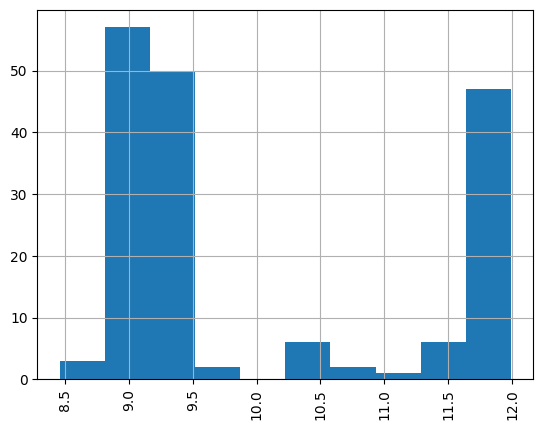

In [ ]:
df_chicken['Price (Latest date)'].hist()
plt.xticks(rotation=90)

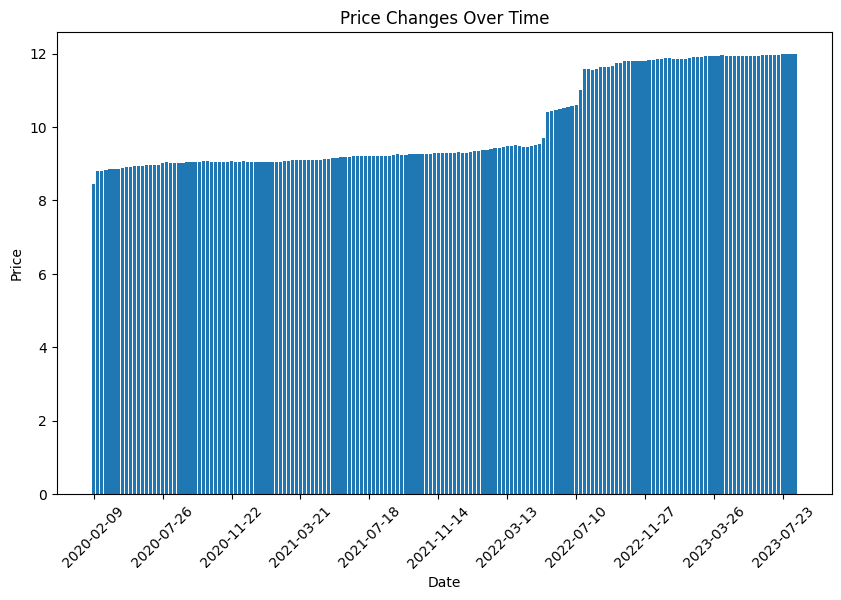

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_chicken['Latest date'], df_chicken['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

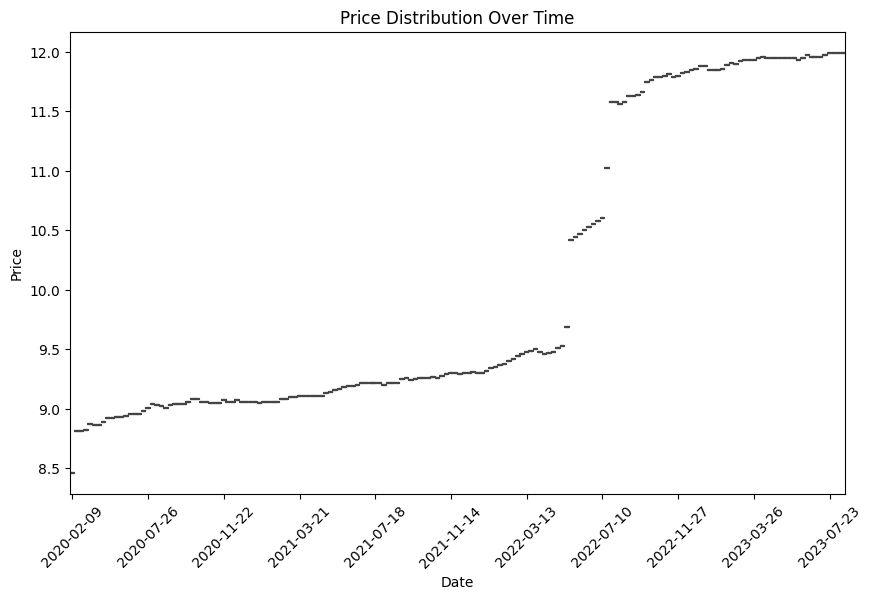

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_chicken['Latest date'], y=df_chicken['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_chicken = df_chicken.drop(columns=columns_to_drop)

In [ ]:
df_chicken

,Country,Product,Price (Latest date),Latest date
0,United States,"Meat of chickens, fresh or chilled (1kg)",8.46,2020-02-09
1,United States,"Meat of chickens, fresh or chilled (1kg)",8.81,2020-04-05
2,United States,"Meat of chickens, fresh or chilled (1kg)",8.81,2020-04-12
3,United States,"Meat of chickens, fresh or chilled (1kg)",8.82,2020-04-19
4,United States,"Meat of chickens, fresh or chilled (1kg)",8.87,2020-04-26
...,...,...,...,...
170,United States,"Meat of chickens, fresh or chilled (1kg)",11.97,2023-07-16
171,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-07-23
172,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-07-30
173,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-08-06


In [ ]:
df_chicken.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_chicken.fillna(method='ffill',inplace=True)

In [ ]:
df_chicken.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_chicken = df_chicken.iloc[1:]
df_chicken

,Country,Product,Price (Latest date),Latest date
1,United States,"Meat of chickens, fresh or chilled (1kg)",8.81,2020-04-05
2,United States,"Meat of chickens, fresh or chilled (1kg)",8.81,2020-04-12
3,United States,"Meat of chickens, fresh or chilled (1kg)",8.82,2020-04-19
4,United States,"Meat of chickens, fresh or chilled (1kg)",8.87,2020-04-26
5,United States,"Meat of chickens, fresh or chilled (1kg)",8.86,2020-05-03
...,...,...,...,...
170,United States,"Meat of chickens, fresh or chilled (1kg)",11.97,2023-07-16
171,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-07-23
172,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-07-30
173,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-08-06


In [ ]:
for i in range(1, 4):
    df_chicken[f'Price {i} week(s) ago'] = df_chicken['Price (Latest date)'].shift(i)

<ipython-input-148-72b8970b3e1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chicken[f'Price {i} week(s) ago'] = df_chicken['Price (Latest date)'].shift(i)
<ipython-input-148-72b8970b3e1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chicken[f'Price {i} week(s) ago'] = df_chicken['Price (Latest date)'].shift(i)
<ipython-input-148-72b8970b3e1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
df_chicken

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,"Meat of chickens, fresh or chilled (1kg)",8.81,2020-04-05,NaN,NaN,NaN
2,United States,"Meat of chickens, fresh or chilled (1kg)",8.81,2020-04-12,8.81,NaN,NaN
3,United States,"Meat of chickens, fresh or chilled (1kg)",8.82,2020-04-19,8.81,8.81,NaN
4,United States,"Meat of chickens, fresh or chilled (1kg)",8.87,2020-04-26,8.82,8.81,8.81
5,United States,"Meat of chickens, fresh or chilled (1kg)",8.86,2020-05-03,8.87,8.82,8.81
...,...,...,...,...,...,...,...
170,United States,"Meat of chickens, fresh or chilled (1kg)",11.97,2023-07-16,11.96,11.96,11.96
171,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-07-23,11.97,11.96,11.96
172,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-07-30,11.99,11.97,11.96
173,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-08-06,11.99,11.99,11.97


In [ ]:
df_chicken = df_chicken.dropna().reset_index(drop=True)

In [ ]:
df_chicken

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,"Meat of chickens, fresh or chilled (1kg)",8.87,2020-04-26,8.82,8.81,8.81
1,United States,"Meat of chickens, fresh or chilled (1kg)",8.86,2020-05-03,8.87,8.82,8.81
2,United States,"Meat of chickens, fresh or chilled (1kg)",8.86,2020-05-10,8.86,8.87,8.82
3,United States,"Meat of chickens, fresh or chilled (1kg)",8.89,2020-05-17,8.86,8.86,8.87
4,United States,"Meat of chickens, fresh or chilled (1kg)",8.92,2020-05-24,8.89,8.86,8.86
...,...,...,...,...,...,...,...
166,United States,"Meat of chickens, fresh or chilled (1kg)",11.97,2023-07-16,11.96,11.96,11.96
167,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-07-23,11.97,11.96,11.96
168,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-07-30,11.99,11.97,11.96
169,United States,"Meat of chickens, fresh or chilled (1kg)",11.99,2023-08-06,11.99,11.99,11.97


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_chicken[df_chicken.columns[4:]],  df_chicken['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
22,9.04,9.04,9.04
115,10.55,10.53,10.50
14,9.01,8.98,8.96
142,11.85,11.85,11.88
111,10.44,10.42,9.69
...,...,...,...
128,11.76,11.75,11.66
84,9.30,9.30,9.29
97,9.42,9.40,9.38
112,10.47,10.44,10.42


In [ ]:
Y_train

22      9.06
115    10.58
14      9.04
142    11.85
111    10.47
       ...  
128    11.79
84      9.29
97      9.44
112    10.50
167    11.99
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9957275771028494


In [ ]:
model.coef_

array([ 1.67000061, -0.57609904,  0.13727667])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 10.057573529411766


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([11.96431459,  9.03105296, 11.68027318,  8.8642325 , 11.95960125,
       11.87787373,  9.12353229, 11.65781313,  9.09068915,  9.12069741,
        9.23356259,  9.23356259, 11.97374126, 10.60243023, 12.00206681,
        9.46871962,  9.20600887,  9.41965065,  9.31603917,  8.87459282,
        9.27357361, 11.63857945, 11.97431734,  9.11127074,  9.48947419,
        9.30887129,  9.0210502 , 11.56703929,  9.07823185, 11.94563422,
        9.54742766, 11.90845808,  9.51609426,  9.05993182,  9.26886027])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.016617258285073433
Mean Squared Error: 0.000903226733470485
Root Mean Squared Error: 0.03005373077457248
R-squared: 0.9994297715223924


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.03411904761904755
Mean Squared Error: 0.006579305555555548
Root Mean Squared Error: 0.08111291854911613
R-squared: 0.9958463282234304


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 100)            41600     
                                                                 
 lstm_7 (LSTM)               (None, 64)                42240     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 2s 54ms/step - loss: 102.1730 - mean_absolute_error: 10.0311 - val_loss: 103.3988 - val_mean_absolute_error: 10.0997
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 101.6181 - mean_absolute_error: 10.0038 - val_loss: 102.8386 - val_mean_absolute_error: 10.0724
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 100.9919 - mean_absolute_error: 9.9729 - val_loss: 102.1276 - val_mean_absolute_error: 10.0376
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 100.1572 - mean_absolute_error: 9.9316 - val_loss: 101.1414 - val_mean_absolute_error: 9.9895
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 98.9756 - mean_absolute_error: 9.8730 - val_loss: 99.7229 - val_mean_absolute_error: 9.9199
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 97.2518 - mean_absolute_error: 9.7871 - val_loss: 97.6454 - val_mean_absolute_error: 9.8176
Epoch 7

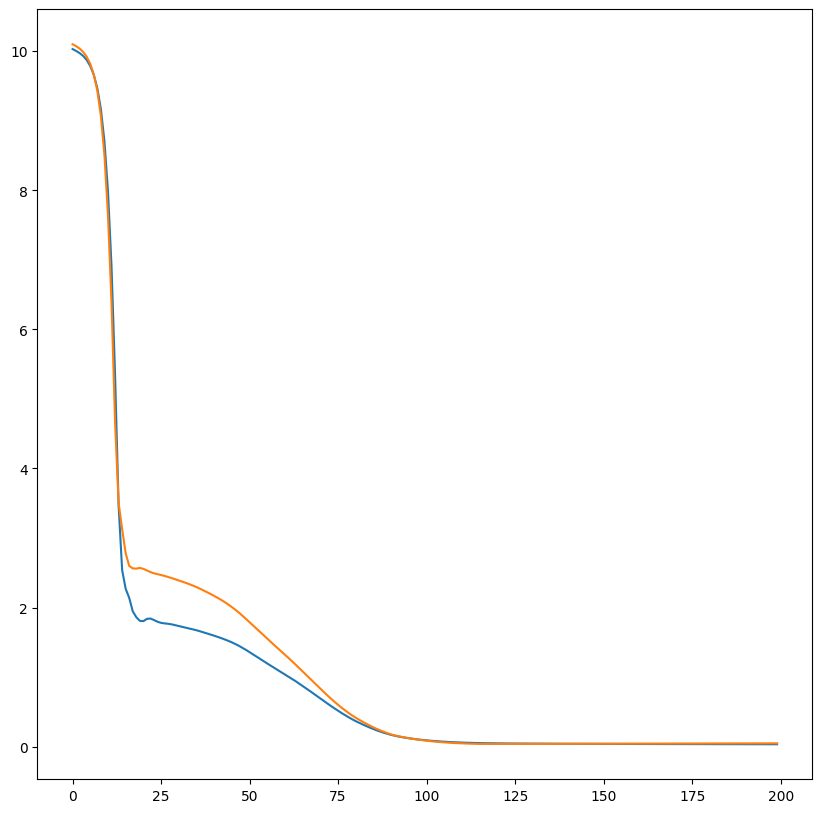

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred

array([[11.955578 ],
       [ 9.018869 ],
       [11.638737 ],
       [ 8.890437 ],
       [11.95443  ],
       [11.861882 ],
       [ 9.104891 ],
       [11.61033  ],
       [ 9.070271 ],
       [ 9.098224 ],
       [ 9.218878 ],
       [ 9.218878 ],
       [11.957851 ],
       [10.705496 ],
       [12.003345 ],
       [ 9.550179 ],
       [ 9.188026 ],
       [ 9.46125  ],
       [ 9.324369 ],
       [ 8.880682 ],
       [ 9.270845 ],
       [11.604918 ],
       [11.9660635],
       [ 9.097741 ],
       [ 9.561408 ],
       [ 9.32589  ],
       [ 9.010128 ],
       [11.508574 ],
       [ 9.058086 ],
       [11.942833 ],
       [ 9.651228 ],
       [11.903645 ],
       [ 9.607077 ],
       [ 9.047271 ],
       [ 9.271424 ]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.02985198974609377
Mean Squared Error: 0.002016631703179607
Root Mean Squared Error: 0.04490692266432434
R-squared: 0.9987268525350431


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9994297715223924
R-squared decision tree regressor:  0.9958463282234304
R-squared neural networkk:  0.9987268525350431


#***5. Milk Dataset***

In [ ]:
df_milk=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - Milk.csv')

In [ ]:
df_milk

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,Processed liquid milk (1lt),0.82,0.82,NaN,$,0.53-1.06,2020-02-09
1,United States,USA,Processed liquid milk (1lt),0.82,0.82,NaN,$,0.52-1.63,2020-04-05
2,United States,USA,Processed liquid milk (1lt),0.82,0.82,NaN,$,0.52-1.63,2020-04-12
3,United States,USA,Processed liquid milk (1lt),0.82,0.82,NaN,$,0.52-1.63,2020-04-19
4,United States,USA,Processed liquid milk (1lt),0.82,0.83,0.70,$,0.41-1.63,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,Processed liquid milk (1lt),0.82,1.03,25.61,$,2.55-7.50,2023-07-16
171,United States,USA,Processed liquid milk (1lt),0.82,1.03,25.61,$,2.55-7.50,2023-07-23
172,United States,USA,Processed liquid milk (1lt),0.82,1.03,25.61,$,2.50-7.50,2023-07-30
173,United States,USA,Processed liquid milk (1lt),0.82,1.03,25.61,$,2.50-7.59,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               170 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_milk.describe(include='all')
print(stats)

              Country ISO3                      Product  \
count             175  175                          175   
unique              1    1                            1   
top     United States  USA  Processed liquid milk (1lt)   
freq              175  175                          175   
mean              NaN  NaN                          NaN   
std               NaN  NaN                          NaN   
min               NaN  NaN                          NaN   
25%               NaN  NaN                          NaN   
50%               NaN  NaN                          NaN   
75%               NaN  NaN                          NaN   
max               NaN  NaN                          NaN   

        Baseline (14 Feb 2020)  Price (Latest date)   Variation Currency  \
count             1.750000e+02           174.000000  170.000000      174   
unique                     NaN                  NaN         NaN        1   
top                        NaN                  NaN         NaN

(array([0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05]),
 [Text(0.8, 0, '0.80'),
  Text(0.8500000000000001, 0, '0.85'),
  Text(0.9, 0, '0.90'),
  Text(0.9500000000000001, 0, '0.95'),
  Text(1.0, 0, '1.00'),
  Text(1.05, 0, '1.05')])

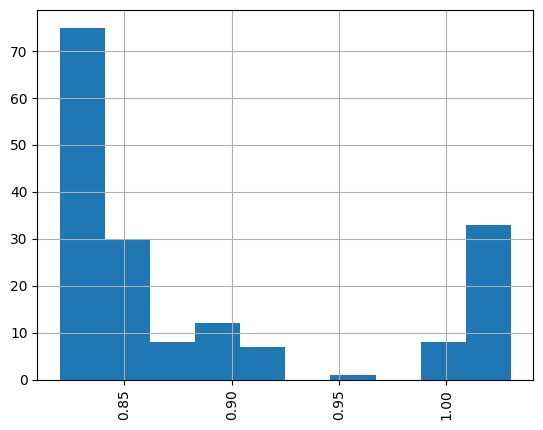

In [ ]:
df_milk['Price (Latest date)'].hist()
plt.xticks(rotation=90)

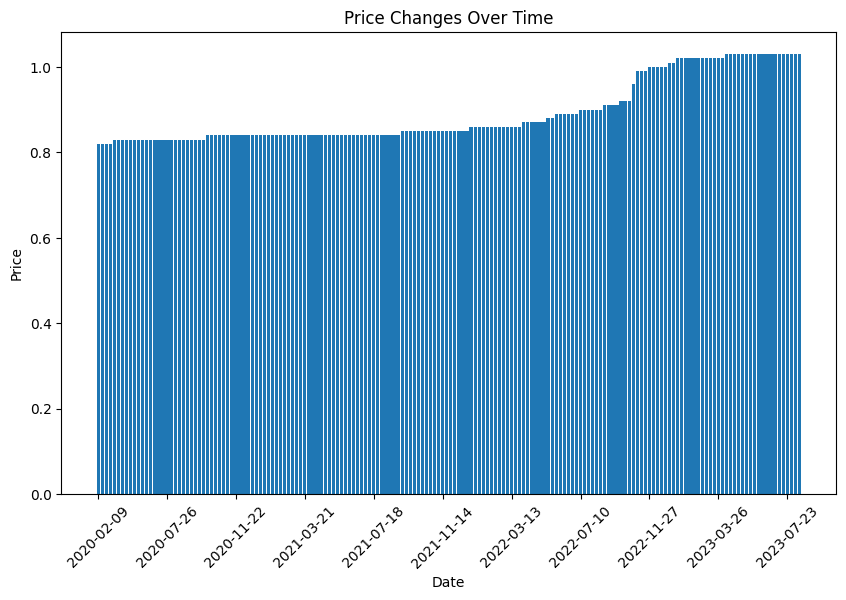

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_milk['Latest date'], df_milk['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

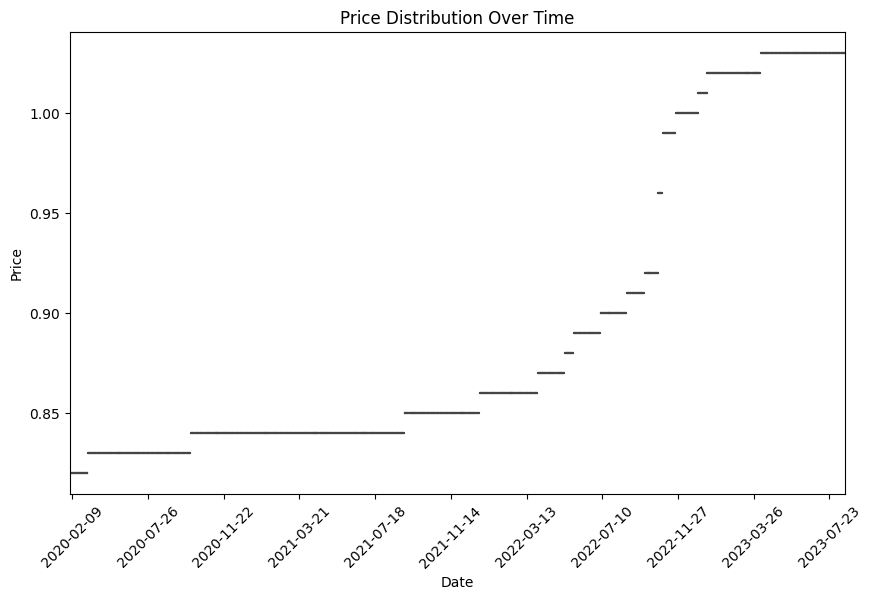

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_milk['Latest date'], y=df_milk['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_milk = df_milk.drop(columns=columns_to_drop)

In [ ]:
df_milk

,Country,Product,Price (Latest date),Latest date
0,United States,Processed liquid milk (1lt),0.82,2020-02-09
1,United States,Processed liquid milk (1lt),0.82,2020-04-05
2,United States,Processed liquid milk (1lt),0.82,2020-04-12
3,United States,Processed liquid milk (1lt),0.82,2020-04-19
4,United States,Processed liquid milk (1lt),0.83,2020-04-26
...,...,...,...,...
170,United States,Processed liquid milk (1lt),1.03,2023-07-16
171,United States,Processed liquid milk (1lt),1.03,2023-07-23
172,United States,Processed liquid milk (1lt),1.03,2023-07-30
173,United States,Processed liquid milk (1lt),1.03,2023-08-06


In [ ]:
df_milk.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_milk.fillna(method='ffill',inplace=True)

In [ ]:
df_milk.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_milk = df_milk.iloc[1:]
df_milk

,Country,Product,Price (Latest date),Latest date
1,United States,Processed liquid milk (1lt),0.82,2020-04-05
2,United States,Processed liquid milk (1lt),0.82,2020-04-12
3,United States,Processed liquid milk (1lt),0.82,2020-04-19
4,United States,Processed liquid milk (1lt),0.83,2020-04-26
5,United States,Processed liquid milk (1lt),0.83,2020-05-03
...,...,...,...,...
170,United States,Processed liquid milk (1lt),1.03,2023-07-16
171,United States,Processed liquid milk (1lt),1.03,2023-07-23
172,United States,Processed liquid milk (1lt),1.03,2023-07-30
173,United States,Processed liquid milk (1lt),1.03,2023-08-06


In [ ]:
for i in range(1, 4):
    df_milk[f'Price {i} week(s) ago'] = df_milk['Price (Latest date)'].shift(i)

<ipython-input-191-efb49e89a0c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_milk[f'Price {i} week(s) ago'] = df_milk['Price (Latest date)'].shift(i)
<ipython-input-191-efb49e89a0c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_milk[f'Price {i} week(s) ago'] = df_milk['Price (Latest date)'].shift(i)
<ipython-input-191-efb49e89a0c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
df_milk

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,Processed liquid milk (1lt),0.82,2020-04-05,NaN,NaN,NaN
2,United States,Processed liquid milk (1lt),0.82,2020-04-12,0.82,NaN,NaN
3,United States,Processed liquid milk (1lt),0.82,2020-04-19,0.82,0.82,NaN
4,United States,Processed liquid milk (1lt),0.83,2020-04-26,0.82,0.82,0.82
5,United States,Processed liquid milk (1lt),0.83,2020-05-03,0.83,0.82,0.82
...,...,...,...,...,...,...,...
170,United States,Processed liquid milk (1lt),1.03,2023-07-16,1.03,1.03,1.03
171,United States,Processed liquid milk (1lt),1.03,2023-07-23,1.03,1.03,1.03
172,United States,Processed liquid milk (1lt),1.03,2023-07-30,1.03,1.03,1.03
173,United States,Processed liquid milk (1lt),1.03,2023-08-06,1.03,1.03,1.03


In [ ]:
df_milk = df_milk.dropna().reset_index(drop=True)

In [ ]:
df_milk

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,Processed liquid milk (1lt),0.83,2020-04-26,0.82,0.82,0.82
1,United States,Processed liquid milk (1lt),0.83,2020-05-03,0.83,0.82,0.82
2,United States,Processed liquid milk (1lt),0.83,2020-05-10,0.83,0.83,0.82
3,United States,Processed liquid milk (1lt),0.83,2020-05-17,0.83,0.83,0.83
4,United States,Processed liquid milk (1lt),0.83,2020-05-24,0.83,0.83,0.83
...,...,...,...,...,...,...,...
166,United States,Processed liquid milk (1lt),1.03,2023-07-16,1.03,1.03,1.03
167,United States,Processed liquid milk (1lt),1.03,2023-07-23,1.03,1.03,1.03
168,United States,Processed liquid milk (1lt),1.03,2023-07-30,1.03,1.03,1.03
169,United States,Processed liquid milk (1lt),1.03,2023-08-06,1.03,1.03,1.03


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_milk[df_milk.columns[4:]],  df_milk['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
110,0.88,0.88,0.87
45,0.84,0.84,0.84
68,0.84,0.84,0.84
3,0.83,0.83,0.83
88,0.85,0.85,0.85
...,...,...,...
21,0.83,0.83,0.83
34,0.84,0.84,0.84
140,1.01,1.01,1.00
7,0.83,0.83,0.83


In [ ]:
Y_train

110    0.89
45     0.84
68     0.84
3      0.83
88     0.85
       ... 
21     0.83
34     0.84
140    1.02
7      0.83
84     0.85
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9961758005259627


In [ ]:
model.coef_

array([ 0.10168212, -0.01916214, -0.00671134])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 0.8957352941176469


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([0.99384648, 0.84059128, 0.83055413, 0.90081417, 0.83055413,
       0.86066558, 0.84059128, 0.89077702, 0.83055413, 0.91085131,
       0.84059128, 0.84059128, 1.02125994, 0.87070272, 1.03129708,
       0.83055413, 0.84059128, 0.83055413, 1.00511314, 0.86066558,
       1.02125994, 0.84059128, 0.85062843, 1.00118564, 0.84059128,
       0.84149061, 0.85062843, 0.84059128, 0.84059128, 0.89167635,
       0.87160205, 0.83055413, 0.86066558, 1.03129708, 0.84059128])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.0020392595641831887
Mean Squared Error: 1.5022360799356018e-05
Root Mean Squared Error: 0.0038758690379521363
R-squared: 0.9967023166835333


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.002098717948717927
Mean Squared Error: 1.5968137738329996e-05
Root Mean Squared Error: 0.003996015232494741
R-squared: 0.9964947013243757


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 100)            41600     
                                                                 
 lstm_9 (LSTM)               (None, 64)                42240     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 2s 57ms/step - loss: 0.7937 - mean_absolute_error: 0.8874 - val_loss: 0.7510 - val_mean_absolute_error: 0.8642
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 0.7423 - mean_absolute_error: 0.8584 - val_loss: 0.7046 - val_mean_absolute_error: 0.8370
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.6852 - mean_absolute_error: 0.8248 - val_loss: 0.6468 - val_mean_absolute_error: 0.8018
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 0.6117 - mean_absolute_error: 0.7795 - val_loss: 0.5725 - val_mean_absolute_error: 0.7539
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.5154 - mean_absolute_error: 0.7155 - val_loss: 0.4772 - val_mean_absolute_error: 0.6871
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3928 - mean_absolute_error: 0.6233 - val_loss: 0.3602 - val_mean_absolute_error: 0.5924
Epoch 7/200
7/7 [===============

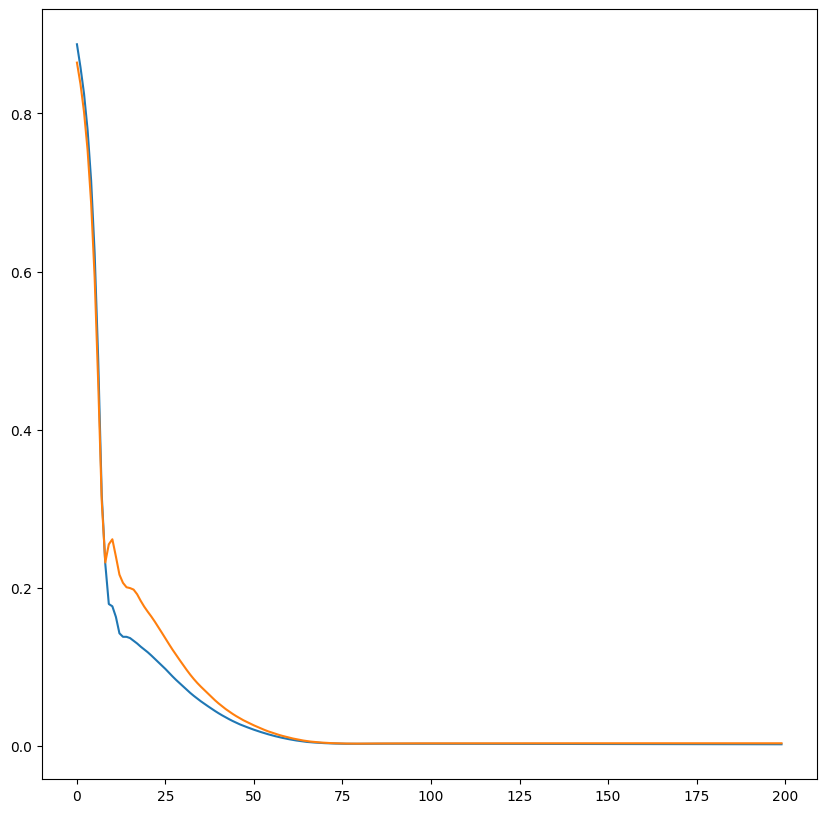

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[1.0041851 ],
       [0.8391502 ],
       [0.8305977 ],
       [0.90685743],
       [0.8305977 ],
       [0.8618722 ],
       [0.8391502 ],
       [0.8989038 ],
       [0.8305977 ],
       [0.9125676 ],
       [0.8391502 ],
       [0.8391502 ],
       [1.0184916 ],
       [0.87626255],
       [1.0292647 ],
       [0.8305977 ],
       [0.8391502 ],
       [0.8305977 ],
       [1.0190096 ],
       [0.8618722 ],
       [1.0184916 ],
       [0.8391502 ],
       [0.849293  ],
       [1.0005175 ],
       [0.8391502 ],
       [0.84117746],
       [0.849293  ],
       [0.8391502 ],
       [0.8391502 ],
       [0.90305215],
       [0.87855875],
       [0.8305977 ],
       [0.86187214],
       [1.0292648 ],
       [0.8391502 ]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.003629533358982633
Mean Squared Error: 4.648732898912224e-05
Root Mean Squared Error: 0.006818161701596864
R-squared: 0.9897951799133261


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9967023166835333
R-squared decision tree regressor:  0.9964947013243757
R-squared neural networkk:  0.9897951799133261


#***6. Onions Dataset***

In [ ]:
df_onions=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - Onions.csv')

In [ ]:
df_onions

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,Onions (kg),2.6,2.60,NaN,$,1.5-4.41,2020-02-09
1,United States,USA,Onions (kg),2.6,2.76,6.15,$,1.1-5.49,2020-04-05
2,United States,USA,Onions (kg),2.6,2.74,5.33,$,1.1-5.49,2020-04-12
3,United States,USA,Onions (kg),2.6,2.74,5.33,$,1.1-5.07,2020-04-19
4,United States,USA,Onions (kg),2.6,2.76,6.15,$,1.1-5.07,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,Onions (kg),2.6,3.00,15.38,$,0.76-2.50,2023-07-16
171,United States,USA,Onions (kg),2.6,3.00,15.38,$,0.76-2.50,2023-07-23
172,United States,USA,Onions (kg),2.6,3.00,15.38,$,0.76-2.50,2023-07-30
173,United States,USA,Onions (kg),2.6,3.00,15.38,$,0.77-2.50,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_onions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               138 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_onions.describe(include='all')
print(stats)

              Country ISO3      Product  Baseline (14 Feb 2020)  \
count             175  175          175                   175.0   
unique              1    1            1                     NaN   
top     United States  USA  Onions (kg)                     NaN   
freq              175  175          175                     NaN   
mean              NaN  NaN          NaN                     2.6   
std               NaN  NaN          NaN                     0.0   
min               NaN  NaN          NaN                     2.6   
25%               NaN  NaN          NaN                     2.6   
50%               NaN  NaN          NaN                     2.6   
75%               NaN  NaN          NaN                     2.6   
max               NaN  NaN          NaN                     2.6   

        Price (Latest date)   Variation Currency      Range Latest date  
count            174.000000  138.000000      174        174         175  
unique                  NaN         NaN        

(array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1]),
 [Text(2.5, 0, '2.5'),
  Text(2.6, 0, '2.6'),
  Text(2.7, 0, '2.7'),
  Text(2.8, 0, '2.8'),
  Text(2.9, 0, '2.9'),
  Text(3.0, 0, '3.0'),
  Text(3.1, 0, '3.1')])

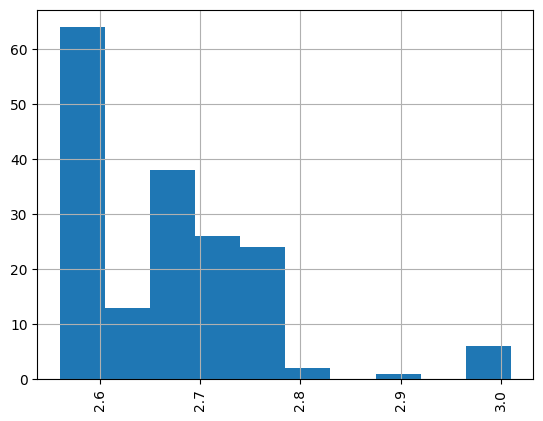

In [ ]:
df_onions['Price (Latest date)'].hist()
plt.xticks(rotation=90)

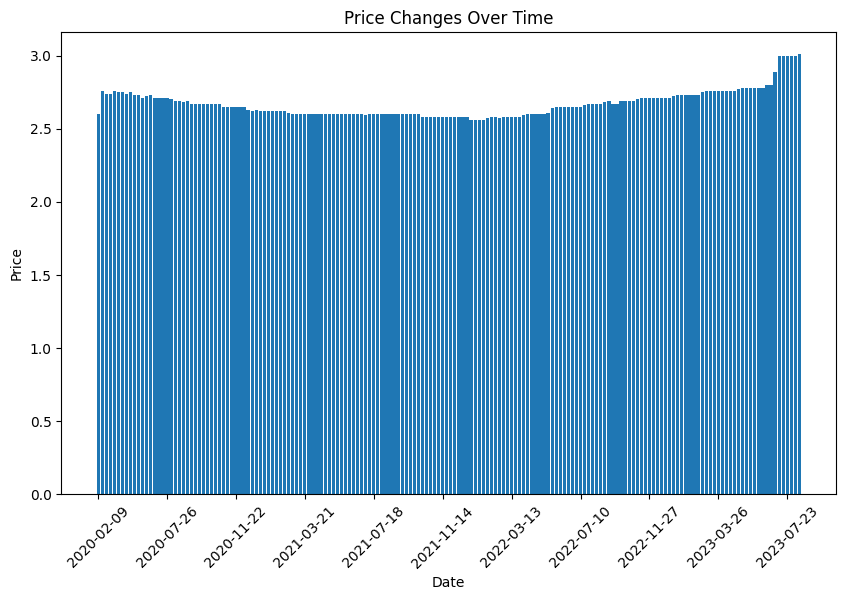

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_onions['Latest date'], df_onions['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

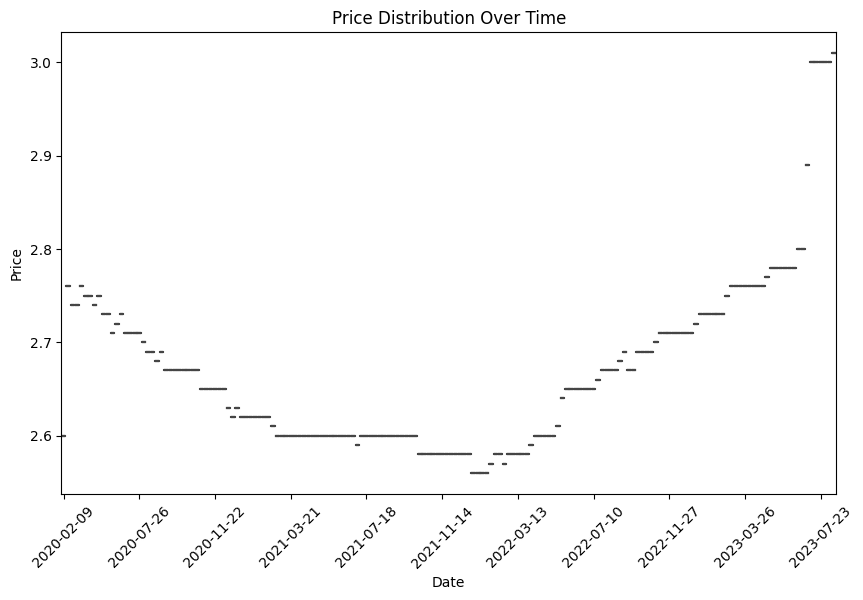

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_onions['Latest date'], y=df_onions['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_onions = df_onions.drop(columns=columns_to_drop)

In [ ]:
df_onions

,Country,Product,Price (Latest date),Latest date
0,United States,Onions (kg),2.60,2020-02-09
1,United States,Onions (kg),2.76,2020-04-05
2,United States,Onions (kg),2.74,2020-04-12
3,United States,Onions (kg),2.74,2020-04-19
4,United States,Onions (kg),2.76,2020-04-26
...,...,...,...,...
170,United States,Onions (kg),3.00,2023-07-16
171,United States,Onions (kg),3.00,2023-07-23
172,United States,Onions (kg),3.00,2023-07-30
173,United States,Onions (kg),3.00,2023-08-06


In [ ]:
df_onions.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_onions.fillna(method='ffill',inplace=True)

In [ ]:
df_onions.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_onions = df_onions.iloc[1:]
df_onions

,Country,Product,Price (Latest date),Latest date
1,United States,Onions (kg),2.76,2020-04-05
2,United States,Onions (kg),2.74,2020-04-12
3,United States,Onions (kg),2.74,2020-04-19
4,United States,Onions (kg),2.76,2020-04-26
5,United States,Onions (kg),2.75,2020-05-03
...,...,...,...,...
170,United States,Onions (kg),3.00,2023-07-16
171,United States,Onions (kg),3.00,2023-07-23
172,United States,Onions (kg),3.00,2023-07-30
173,United States,Onions (kg),3.00,2023-08-06


In [ ]:
for i in range(1, 4):
    df_onions[f'Price {i} week(s) ago'] = df_onions['Price (Latest date)'].shift(i)

<ipython-input-234-8871d92e34ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onions[f'Price {i} week(s) ago'] = df_onions['Price (Latest date)'].shift(i)
<ipython-input-234-8871d92e34ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_onions[f'Price {i} week(s) ago'] = df_onions['Price (Latest date)'].shift(i)
<ipython-input-234-8871d92e34ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
df_onions

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,Onions (kg),2.76,2020-04-05,NaN,NaN,NaN
2,United States,Onions (kg),2.74,2020-04-12,2.76,NaN,NaN
3,United States,Onions (kg),2.74,2020-04-19,2.74,2.76,NaN
4,United States,Onions (kg),2.76,2020-04-26,2.74,2.74,2.76
5,United States,Onions (kg),2.75,2020-05-03,2.76,2.74,2.74
...,...,...,...,...,...,...,...
170,United States,Onions (kg),3.00,2023-07-16,3.00,2.89,2.80
171,United States,Onions (kg),3.00,2023-07-23,3.00,3.00,2.89
172,United States,Onions (kg),3.00,2023-07-30,3.00,3.00,3.00
173,United States,Onions (kg),3.00,2023-08-06,3.00,3.00,3.00


In [ ]:
df_onions = df_onions.dropna().reset_index(drop=True)

In [ ]:
df_onions

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,Onions (kg),2.76,2020-04-26,2.74,2.74,2.76
1,United States,Onions (kg),2.75,2020-05-03,2.76,2.74,2.74
2,United States,Onions (kg),2.75,2020-05-10,2.75,2.76,2.74
3,United States,Onions (kg),2.74,2020-05-17,2.75,2.75,2.76
4,United States,Onions (kg),2.75,2020-05-24,2.74,2.75,2.75
...,...,...,...,...,...,...,...
166,United States,Onions (kg),3.00,2023-07-16,3.00,2.89,2.80
167,United States,Onions (kg),3.00,2023-07-23,3.00,3.00,2.89
168,United States,Onions (kg),3.00,2023-07-30,3.00,3.00,3.00
169,United States,Onions (kg),3.00,2023-08-06,3.00,3.00,3.00


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_onions[df_onions.columns[4:]],  df_onions['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
97,2.57,2.58,2.58
27,2.67,2.67,2.67
3,2.75,2.75,2.76
153,2.76,2.76,2.76
33,2.65,2.65,2.65
...,...,...,...
158,2.78,2.78,2.77
135,2.71,2.71,2.71
40,2.62,2.62,2.62
63,2.60,2.60,2.60


In [ ]:
Y_train

97     2.58
27     2.65
3      2.74
153    2.76
33     2.63
       ... 
158    2.78
135    2.71
40     2.62
63     2.59
69     2.60
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9808734548086206


In [ ]:
model.coef_

array([ 0.12272714, -0.0476805 ,  0.01541273])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 2.663897058823529


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([2.73169533, 2.59991632, 2.78511076, 2.81325945, 2.67193638,
       2.58328422, 2.58115238, 2.57933915, 2.73761293, 3.01145953,
       2.76256107, 2.69448607, 2.77210513, 2.7645336 , 2.73366786,
       2.7645336 , 2.69251354, 2.57933915, 2.73548109, 2.59991632,
       2.7643743 , 2.57736662, 2.59991632, 2.67193638, 2.59991632,
       2.69432677, 2.70658788, 2.73366786, 2.70354664, 2.60172954,
       2.76000332, 2.74651419, 2.67843919, 2.57933915, 2.59794378])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.006879021782623049
Mean Squared Error: 0.00011493524856633398
Root Mean Squared Error: 0.010720785818508547
R-squared: 0.9859910372230201


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.009765608465608505
Mean Squared Error: 0.0003569142955124451
Root Mean Squared Error: 0.018892175510312335
R-squared: 0.9564972526463876


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 100)            41600     
                                                                 
 lstm_11 (LSTM)              (None, 64)                42240     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 2s 73ms/step - loss: 7.0425 - mean_absolute_error: 2.6520 - val_loss: 6.8924 - val_mean_absolute_error: 2.6242
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 6.8786 - mean_absolute_error: 2.6211 - val_loss: 6.7122 - val_mean_absolute_error: 2.5896
Epoch 3/200
7/7 [==============================] - 0s 10ms/step - loss: 6.6715 - mean_absolute_error: 2.5813 - val_loss: 6.4799 - val_mean_absolute_error: 2.5444
Epoch 4/200
7/7 [==============================] - 0s 13ms/step - loss: 6.3976 - mean_absolute_error: 2.5277 - val_loss: 6.1736 - val_mean_absolute_error: 2.4834
Epoch 5/200
7/7 [==============================] - 0s 13ms/step - loss: 6.0282 - mean_absolute_error: 2.4531 - val_loss: 5.7624 - val_mean_absolute_error: 2.3989
Epoch 6/200
7/7 [==============================] - 0s 9ms/step - loss: 5.5266 - mean_absolute_error: 2.3458 - val_loss: 5.2083 - val_mean_absolute_error: 2.2795
Epoch 7/200
7/7 [============

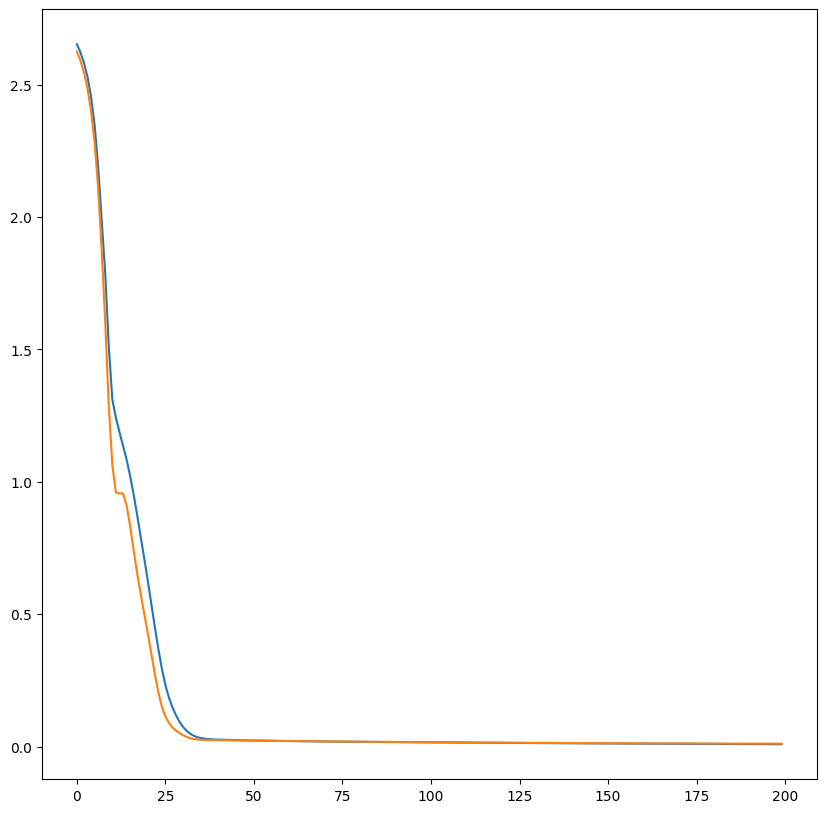

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 5ms/step


In [ ]:
y_pred

array([[2.7209797],
       [2.594572 ],
       [2.7940824],
       [2.8230212],
       [2.6753223],
       [2.588484 ],
       [2.5854385],
       [2.5780623],
       [2.743386 ],
       [3.002622 ],
       [2.7648206],
       [2.6775248],
       [2.768524 ],
       [2.7698452],
       [2.7277515],
       [2.7698452],
       [2.6753476],
       [2.5780623],
       [2.7230546],
       [2.594572 ],
       [2.756356 ],
       [2.5736086],
       [2.594572 ],
       [2.6753223],
       [2.594572 ],
       [2.6848962],
       [2.683959 ],
       [2.7277515],
       [2.697613 ],
       [2.5899527],
       [2.7631083],
       [2.7478573],
       [2.6679914],
       [2.5780623],
       [2.5866024]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.010756689616612063
Mean Squared Error: 0.00019423719082170942
Root Mean Squared Error: 0.013936900330479134
R-squared: 0.9763252647898


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9859910372230201
R-squared decision tree regressor:  0.9564972526463876
R-squared neural networkk:  0.9763252647898


#***7. Oranges Dataset***

In [ ]:
df_oranges=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - Oranges.csv')

In [ ]:
df_oranges

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,Orange (1kg),3.96,3.96,NaN,$,2.2-6.61,2020-02-09
1,United States,USA,Orange (1kg),3.96,4.17,5.30,$,2.01-8.82,2020-04-05
2,United States,USA,Orange (1kg),3.96,4.14,4.65,$,1.98-8.82,2020-04-12
3,United States,USA,Orange (1kg),3.96,4.14,4.47,$,1.98-8.82,2020-04-19
4,United States,USA,Orange (1kg),3.96,4.13,4.40,$,1.98-8.82,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,Orange (1kg),3.96,4.19,5.81,$,0.79-4.99,2023-07-16
171,United States,USA,Orange (1kg),3.96,4.19,5.81,$,0.79-4.99,2023-07-23
172,United States,USA,Orange (1kg),3.96,4.19,5.81,$,0.79-4.99,2023-07-30
173,United States,USA,Orange (1kg),3.96,4.19,5.81,$,0.79-4.99,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_oranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               173 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_oranges.describe(include='all')
print(stats)

              Country ISO3       Product  Baseline (14 Feb 2020)  \
count             175  175           175            1.750000e+02   
unique              1    1             1                     NaN   
top     United States  USA  Orange (1kg)                     NaN   
freq              175  175           175                     NaN   
mean              NaN  NaN           NaN            3.960000e+00   
std               NaN  NaN           NaN            4.453635e-16   
min               NaN  NaN           NaN            3.960000e+00   
25%               NaN  NaN           NaN            3.960000e+00   
50%               NaN  NaN           NaN            3.960000e+00   
75%               NaN  NaN           NaN            3.960000e+00   
max               NaN  NaN           NaN            3.960000e+00   

        Price (Latest date)   Variation Currency      Range Latest date  
count            174.000000  173.000000      174        174         175  
unique                  NaN        

(array([3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25]),
 [Text(3.9000000000000004, 0, '3.90'),
  Text(3.95, 0, '3.95'),
  Text(4.0, 0, '4.00'),
  Text(4.050000000000001, 0, '4.05'),
  Text(4.1000000000000005, 0, '4.10'),
  Text(4.15, 0, '4.15'),
  Text(4.2, 0, '4.20'),
  Text(4.25, 0, '4.25')])

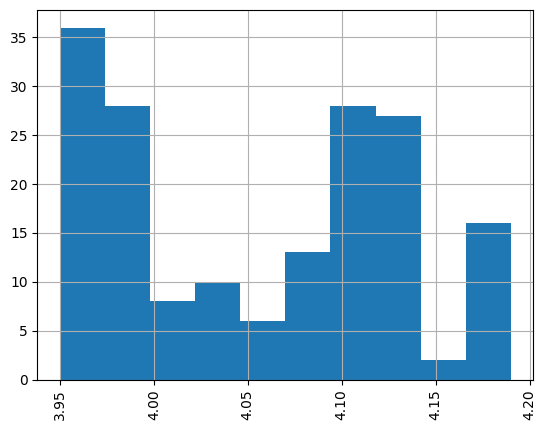

In [ ]:
df_oranges['Price (Latest date)'].hist()
plt.xticks(rotation=90)

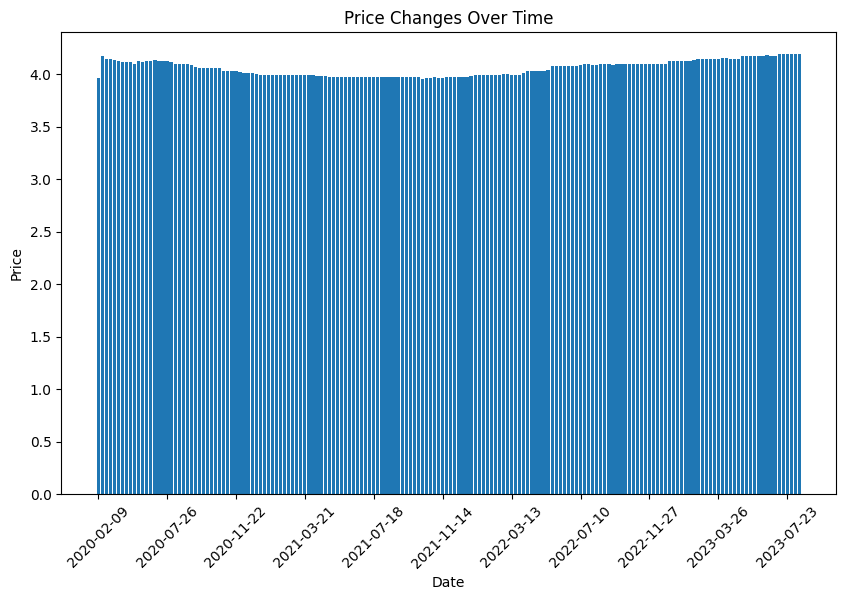

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_oranges['Latest date'], df_oranges['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

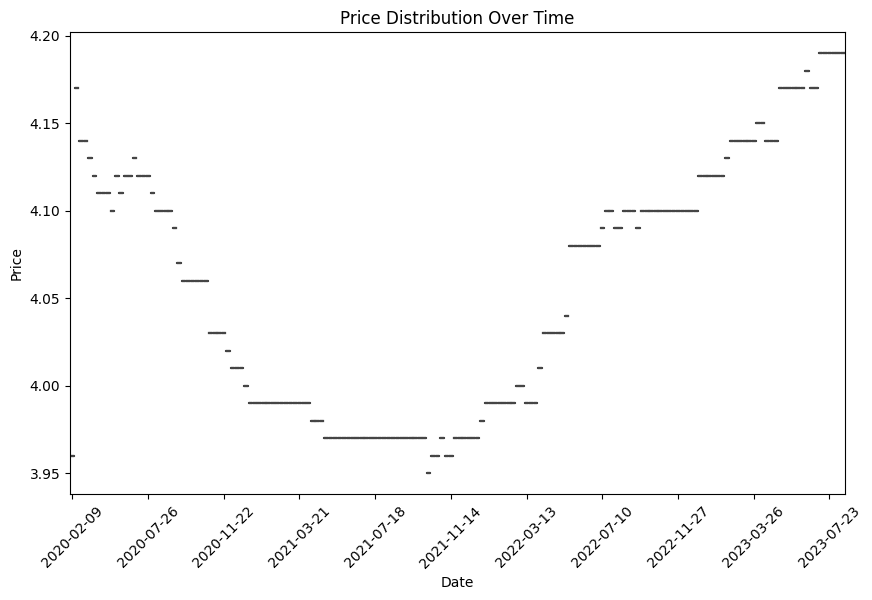

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_oranges['Latest date'], y=df_oranges['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_oranges = df_oranges.drop(columns=columns_to_drop)

In [ ]:
df_oranges

,Country,Product,Price (Latest date),Latest date
0,United States,Orange (1kg),3.96,2020-02-09
1,United States,Orange (1kg),4.17,2020-04-05
2,United States,Orange (1kg),4.14,2020-04-12
3,United States,Orange (1kg),4.14,2020-04-19
4,United States,Orange (1kg),4.13,2020-04-26
...,...,...,...,...
170,United States,Orange (1kg),4.19,2023-07-16
171,United States,Orange (1kg),4.19,2023-07-23
172,United States,Orange (1kg),4.19,2023-07-30
173,United States,Orange (1kg),4.19,2023-08-06


In [ ]:
df_oranges.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_oranges.fillna(method='ffill',inplace=True)

In [ ]:
df_oranges.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_oranges = df_oranges.iloc[1:]
df_oranges

,Country,Product,Price (Latest date),Latest date
1,United States,Orange (1kg),4.17,2020-04-05
2,United States,Orange (1kg),4.14,2020-04-12
3,United States,Orange (1kg),4.14,2020-04-19
4,United States,Orange (1kg),4.13,2020-04-26
5,United States,Orange (1kg),4.12,2020-05-03
...,...,...,...,...
170,United States,Orange (1kg),4.19,2023-07-16
171,United States,Orange (1kg),4.19,2023-07-23
172,United States,Orange (1kg),4.19,2023-07-30
173,United States,Orange (1kg),4.19,2023-08-06


In [ ]:
for i in range(1, 4):
    df_oranges[f'Price {i} week(s) ago'] = df_oranges['Price (Latest date)'].shift(i)

<ipython-input-277-609f5107a65d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oranges[f'Price {i} week(s) ago'] = df_oranges['Price (Latest date)'].shift(i)
<ipython-input-277-609f5107a65d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oranges[f'Price {i} week(s) ago'] = df_oranges['Price (Latest date)'].shift(i)
<ipython-input-277-609f5107a65d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
df_oranges

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,Orange (1kg),4.17,2020-04-05,NaN,NaN,NaN
2,United States,Orange (1kg),4.14,2020-04-12,4.17,NaN,NaN
3,United States,Orange (1kg),4.14,2020-04-19,4.14,4.17,NaN
4,United States,Orange (1kg),4.13,2020-04-26,4.14,4.14,4.17
5,United States,Orange (1kg),4.12,2020-05-03,4.13,4.14,4.14
...,...,...,...,...,...,...,...
170,United States,Orange (1kg),4.19,2023-07-16,4.19,4.17,4.17
171,United States,Orange (1kg),4.19,2023-07-23,4.19,4.19,4.17
172,United States,Orange (1kg),4.19,2023-07-30,4.19,4.19,4.19
173,United States,Orange (1kg),4.19,2023-08-06,4.19,4.19,4.19


In [ ]:
df_oranges = df_oranges.dropna().reset_index(drop=True)

In [ ]:
df_oranges

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,Orange (1kg),4.13,2020-04-26,4.14,4.14,4.17
1,United States,Orange (1kg),4.12,2020-05-03,4.13,4.14,4.14
2,United States,Orange (1kg),4.11,2020-05-10,4.12,4.13,4.14
3,United States,Orange (1kg),4.11,2020-05-17,4.11,4.12,4.13
4,United States,Orange (1kg),4.11,2020-05-24,4.11,4.11,4.12
...,...,...,...,...,...,...,...
166,United States,Orange (1kg),4.19,2023-07-16,4.19,4.17,4.17
167,United States,Orange (1kg),4.19,2023-07-23,4.19,4.19,4.17
168,United States,Orange (1kg),4.19,2023-07-30,4.19,4.19,4.19
169,United States,Orange (1kg),4.19,2023-08-06,4.19,4.19,4.19


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_oranges[df_oranges.columns[4:]],  df_oranges['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
109,4.04,4.03,4.03
1,4.13,4.14,4.14
22,4.06,4.07,4.09
8,4.11,4.12,4.10
9,4.12,4.11,4.12
...,...,...,...
25,4.06,4.06,4.06
140,4.12,4.12,4.10
82,3.96,3.97,3.96
143,4.12,4.12,4.12


In [ ]:
Y_train

109    4.08
1      4.12
22     4.06
8      4.12
9      4.12
       ... 
25     4.06
140    4.12
82     3.96
143    4.12
149    4.14
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9879761550965849


In [ ]:
model.coef_

array([ 0.07779102, -0.00376064, -0.00283874])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 4.055514705882352


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([4.0309399 , 3.97033816, 4.0289521 , 4.11985471, 3.97033816,
       4.05965053, 4.03014478, 3.97033816, 4.06004809, 3.9902737 ,
       4.1411116 , 4.12025227, 3.98122972, 3.97033816, 4.19147668,
       4.11945715, 3.97033816, 4.13979025, 3.97033816, 4.09991917,
       4.09991917, 4.11985471, 3.9902737 , 4.00888789, 4.09991917,
       3.9902737 , 4.16969356, 3.95997283, 4.17246493, 3.98987614,
       3.97033816, 4.07998363, 4.10031673, 4.03014478, 4.08955384])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.0032222371882410427
Mean Squared Error: 4.6118961400249356e-05
Root Mean Squared Error: 0.006791094271194397
R-squared: 0.9909453268398716


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.005101253132832489
Mean Squared Error: 7.353942311920511e-05
Root Mean Squared Error: 0.008575512994521384
R-squared: 0.98556178585745


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 100)            41600     
                                                                 
 lstm_13 (LSTM)              (None, 64)                42240     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 2s 52ms/step - loss: 16.3428 - mean_absolute_error: 4.0420 - val_loss: 16.2033 - val_mean_absolute_error: 4.0247
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 16.1220 - mean_absolute_error: 4.0146 - val_loss: 15.9531 - val_mean_absolute_error: 3.9935
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 15.8427 - mean_absolute_error: 3.9796 - val_loss: 15.6109 - val_mean_absolute_error: 3.9504
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 15.4539 - mean_absolute_error: 3.9304 - val_loss: 15.1291 - val_mean_absolute_error: 3.8888
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 14.9032 - mean_absolute_error: 3.8595 - val_loss: 14.4329 - val_mean_absolute_error: 3.7978
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 14.1066 - mean_absolute_error: 3.7540 - val_loss: 13.4224 - val_mean_absolute_error: 3.6609
Epoch 7/200
7/7 [===

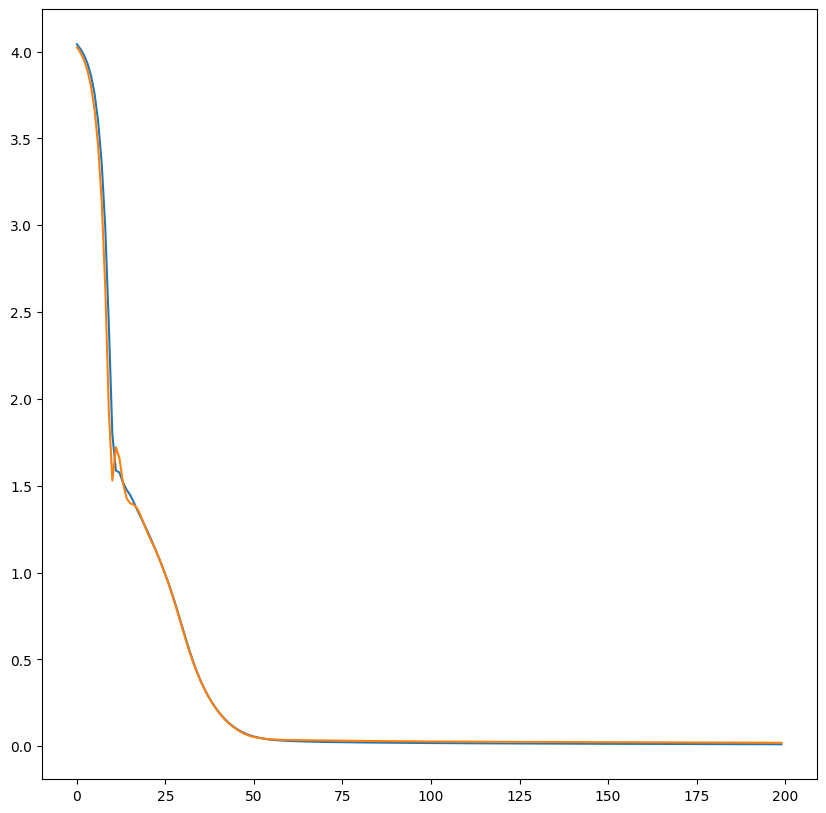

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 12ms/step


In [ ]:
y_pred

array([[4.0370626],
       [3.971622 ],
       [4.1269913],
       [4.1220846],
       [3.971622 ],
       [4.109117 ],
       [4.0779123],
       [3.971622 ],
       [4.1049614],
       [3.985523 ],
       [4.137889 ],
       [4.1108537],
       [3.9885209],
       [3.971622 ],
       [4.1889453],
       [4.13472  ],
       [3.971622 ],
       [4.150288 ],
       [3.971622 ],
       [4.091097 ],
       [4.091097 ],
       [4.1220846],
       [3.985523 ],
       [4.0424237],
       [4.091097 ],
       [3.985523 ],
       [4.172339 ],
       [3.9759207],
       [4.184309 ],
       [3.9947968],
       [3.9716218],
       [4.0673313],
       [4.0789795],
       [4.0779123],
       [4.081784 ]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.015445253372192307
Mean Squared Error: 0.000664318651988976
Root Mean Squared Error: 0.025774379759539823
R-squared: 0.8695723388969295


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9909453268398716
R-squared decision tree regressor:  0.98556178585745
R-squared neural networkk:  0.8695723388969295


#***8. Potatoes Dataset***

In [ ]:
df_potatoes=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - Potatoes.csv')

In [ ]:
df_potatoes

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,Potatoes (1kg),2.59,2.59,NaN,$,1.21-4.41,2020-02-09
1,United States,USA,Potatoes (1kg),2.59,2.71,4.63,$,1.1-6.61,2020-04-05
2,United States,USA,Potatoes (1kg),2.59,2.70,4.08,$,1.1-6.61,2020-04-12
3,United States,USA,Potatoes (1kg),2.59,2.70,4.08,$,1.1-6.61,2020-04-19
4,United States,USA,Potatoes (1kg),2.59,2.71,4.63,$,1.1-6.61,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,Potatoes (1kg),2.59,3.00,15.83,$,0.50-3.00,2023-07-16
171,United States,USA,Potatoes (1kg),2.59,3.00,15.83,$,0.50-3.00,2023-07-23
172,United States,USA,Potatoes (1kg),2.59,3.00,15.83,$,0.50-3.00,2023-07-30
173,United States,USA,Potatoes (1kg),2.59,3.00,15.83,$,0.50-3.00,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_potatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               173 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_potatoes.describe(include='all')
print(stats)

              Country ISO3         Product  Baseline (14 Feb 2020)  \
count             175  175             175                  175.00   
unique              1    1               1                     NaN   
top     United States  USA  Potatoes (1kg)                     NaN   
freq              175  175             175                     NaN   
mean              NaN  NaN             NaN                    2.59   
std               NaN  NaN             NaN                    0.00   
min               NaN  NaN             NaN                    2.59   
25%               NaN  NaN             NaN                    2.59   
50%               NaN  NaN             NaN                    2.59   
75%               NaN  NaN             NaN                    2.59   
max               NaN  NaN             NaN                    2.59   

        Price (Latest date)   Variation Currency      Range Latest date  
count            174.000000  173.000000      174        174         175  
unique     

(array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1]),
 [Text(2.5, 0, '2.5'),
  Text(2.6, 0, '2.6'),
  Text(2.7, 0, '2.7'),
  Text(2.8, 0, '2.8'),
  Text(2.9, 0, '2.9'),
  Text(3.0, 0, '3.0'),
  Text(3.1, 0, '3.1')])

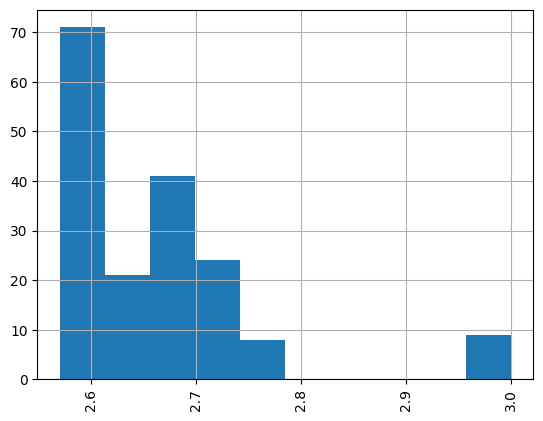

In [ ]:
df_potatoes['Price (Latest date)'].hist()
plt.xticks(rotation=90)

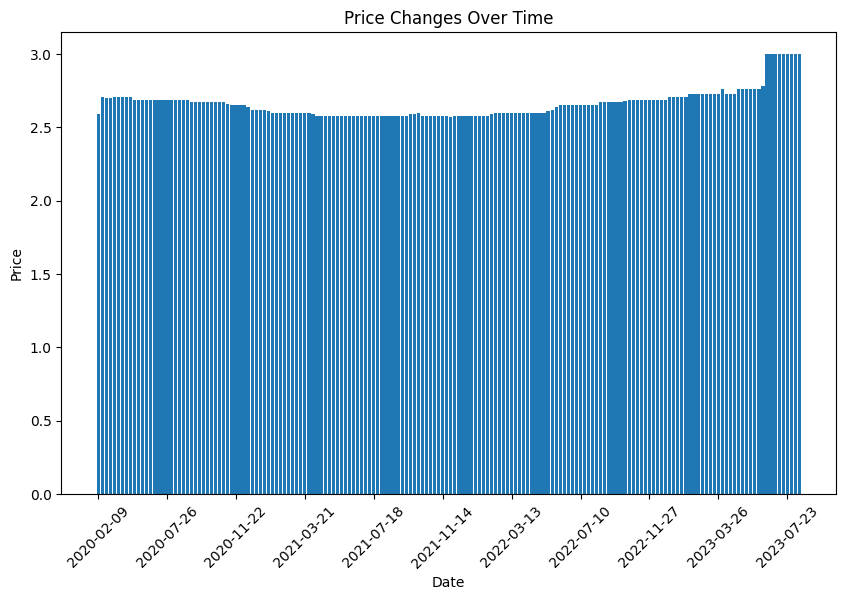

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_potatoes['Latest date'], df_potatoes['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

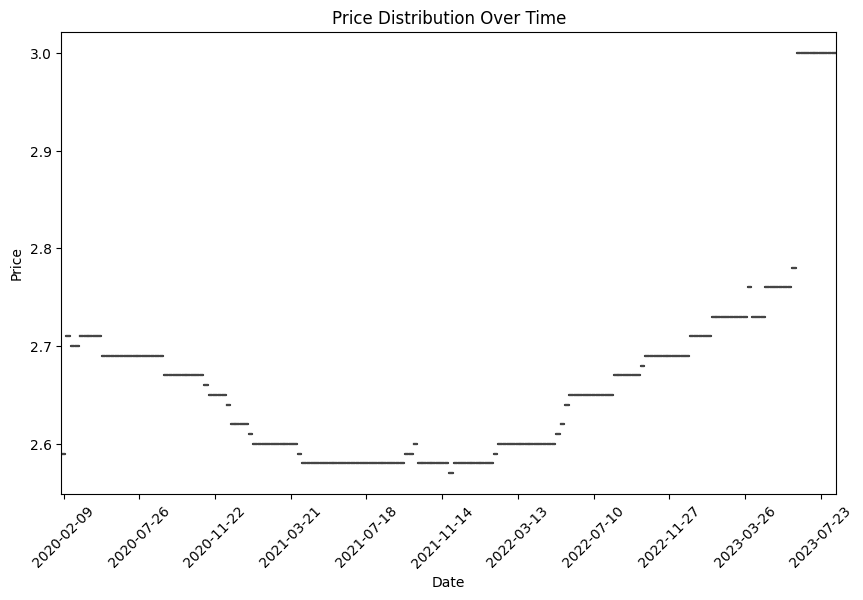

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_potatoes['Latest date'], y=df_potatoes['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_potatoes = df_potatoes.drop(columns=columns_to_drop)

In [ ]:
df_potatoes

,Country,Product,Price (Latest date),Latest date
0,United States,Potatoes (1kg),2.59,2020-02-09
1,United States,Potatoes (1kg),2.71,2020-04-05
2,United States,Potatoes (1kg),2.70,2020-04-12
3,United States,Potatoes (1kg),2.70,2020-04-19
4,United States,Potatoes (1kg),2.71,2020-04-26
...,...,...,...,...
170,United States,Potatoes (1kg),3.00,2023-07-16
171,United States,Potatoes (1kg),3.00,2023-07-23
172,United States,Potatoes (1kg),3.00,2023-07-30
173,United States,Potatoes (1kg),3.00,2023-08-06


In [ ]:
df_potatoes.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_potatoes.fillna(method='ffill',inplace=True)

In [ ]:
df_potatoes.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_potatoes = df_potatoes.iloc[1:]
df_potatoes

,Country,Product,Price (Latest date),Latest date
1,United States,Potatoes (1kg),2.71,2020-04-05
2,United States,Potatoes (1kg),2.70,2020-04-12
3,United States,Potatoes (1kg),2.70,2020-04-19
4,United States,Potatoes (1kg),2.71,2020-04-26
5,United States,Potatoes (1kg),2.71,2020-05-03
...,...,...,...,...
170,United States,Potatoes (1kg),3.00,2023-07-16
171,United States,Potatoes (1kg),3.00,2023-07-23
172,United States,Potatoes (1kg),3.00,2023-07-30
173,United States,Potatoes (1kg),3.00,2023-08-06


In [ ]:
for i in range(1, 4):
    df_potatoes[f'Price {i} week(s) ago'] = df_potatoes['Price (Latest date)'].shift(i)

<ipython-input-320-69aaffa7b41c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_potatoes[f'Price {i} week(s) ago'] = df_potatoes['Price (Latest date)'].shift(i)
<ipython-input-320-69aaffa7b41c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_potatoes[f'Price {i} week(s) ago'] = df_potatoes['Price (Latest date)'].shift(i)
<ipython-input-320-69aaffa7b41c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
df_potatoes

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,Potatoes (1kg),2.71,2020-04-05,NaN,NaN,NaN
2,United States,Potatoes (1kg),2.70,2020-04-12,2.71,NaN,NaN
3,United States,Potatoes (1kg),2.70,2020-04-19,2.70,2.71,NaN
4,United States,Potatoes (1kg),2.71,2020-04-26,2.70,2.70,2.71
5,United States,Potatoes (1kg),2.71,2020-05-03,2.71,2.70,2.70
...,...,...,...,...,...,...,...
170,United States,Potatoes (1kg),3.00,2023-07-16,3.00,3.00,3.00
171,United States,Potatoes (1kg),3.00,2023-07-23,3.00,3.00,3.00
172,United States,Potatoes (1kg),3.00,2023-07-30,3.00,3.00,3.00
173,United States,Potatoes (1kg),3.00,2023-08-06,3.00,3.00,3.00


In [ ]:
df_potatoes = df_potatoes.dropna().reset_index(drop=True)

In [ ]:
df_potatoes

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,Potatoes (1kg),2.71,2020-04-26,2.70,2.70,2.71
1,United States,Potatoes (1kg),2.71,2020-05-03,2.71,2.70,2.70
2,United States,Potatoes (1kg),2.71,2020-05-10,2.71,2.71,2.70
3,United States,Potatoes (1kg),2.71,2020-05-17,2.71,2.71,2.71
4,United States,Potatoes (1kg),2.71,2020-05-24,2.71,2.71,2.71
...,...,...,...,...,...,...,...
166,United States,Potatoes (1kg),3.00,2023-07-16,3.00,3.00,3.00
167,United States,Potatoes (1kg),3.00,2023-07-23,3.00,3.00,3.00
168,United States,Potatoes (1kg),3.00,2023-07-30,3.00,3.00,3.00
169,United States,Potatoes (1kg),3.00,2023-08-06,3.00,3.00,3.00


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_potatoes[df_potatoes.columns[4:]],  df_potatoes['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
163,3.00,2.78,2.76
60,2.58,2.58,2.58
99,2.60,2.60,2.60
1,2.71,2.70,2.70
50,2.59,2.60,2.60
...,...,...,...
21,2.67,2.67,2.69
92,2.58,2.58,2.58
157,2.76,2.76,2.73
93,2.58,2.58,2.58


In [ ]:
Y_train

163    3.00
60     2.58
99     2.60
1      2.71
50     2.58
       ... 
21     2.67
92     2.58
157    2.76
93     2.58
16     2.69
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9642372126877178


In [ ]:
model.coef_

array([ 0.1081416 , -0.00942208,  0.00412936])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 2.6702205882352943


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([2.58068902, 2.6926094 , 2.65166729, 2.6926094 , 2.58024173,
       2.64214276, 2.58024173, 2.6926094 , 2.76570141, 2.60067222,
       2.60067222, 2.58024173, 2.67217892, 2.58024173, 2.60022492,
       2.58024173, 2.58121746, 2.65174843, 2.67217892, 2.65174843,
       2.65174843, 2.65174843, 2.58024173, 2.58024173, 2.73347038,
       2.60067222, 2.59098541, 2.6926094 , 2.60067222, 2.71303989,
       2.60067222, 2.6926094 , 2.67217892, 2.60067222, 2.6926094 ])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.0037494644186345863
Mean Squared Error: 5.803585231119894e-05
Root Mean Squared Error: 0.007618126561773501
R-squared: 0.9762814709143862


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.0039833333333339
Mean Squared Error: 8.976567460317445e-05
Root Mean Squared Error: 0.0094744748985458
R-squared: 0.9633138882401785


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 1, 100)            41600     
                                                                 
 lstm_15 (LSTM)              (None, 64)                42240     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 3s 72ms/step - loss: 7.0498 - mean_absolute_error: 2.6533 - val_loss: 7.0004 - val_mean_absolute_error: 2.6449
Epoch 2/200
7/7 [==============================] - 0s 13ms/step - loss: 6.8933 - mean_absolute_error: 2.6241 - val_loss: 6.8352 - val_mean_absolute_error: 2.6138
Epoch 3/200
7/7 [==============================] - 0s 13ms/step - loss: 6.6999 - mean_absolute_error: 2.5874 - val_loss: 6.6238 - val_mean_absolute_error: 2.5732
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 6.4419 - mean_absolute_error: 2.5371 - val_loss: 6.3434 - val_mean_absolute_error: 2.5177
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 6.0928 - mean_absolute_error: 2.4662 - val_loss: 5.9741 - val_mean_absolute_error: 2.4410
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 5.6316 - mean_absolute_error: 2.3653 - val_loss: 5.4995 - val_mean_absolute_error: 2.3330
Epoch 7/200
7/7 [===========

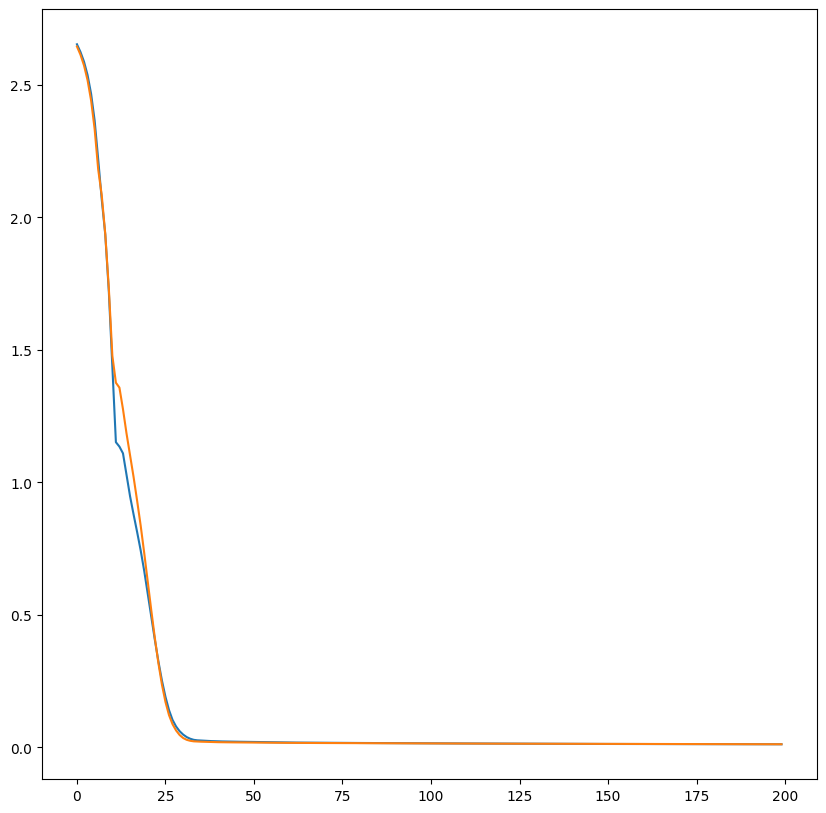

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([[2.5871027],
       [2.6841888],
       [2.6674666],
       [2.6841888],
       [2.5839453],
       [2.6320739],
       [2.5839453],
       [2.6841888],
       [2.7726626],
       [2.5917313],
       [2.5917313],
       [2.5839453],
       [2.6832302],
       [2.5839453],
       [2.5898952],
       [2.5839453],
       [2.6080067],
       [2.664188 ],
       [2.6832302],
       [2.664188 ],
       [2.664188 ],
       [2.664188 ],
       [2.5839453],
       [2.5839453],
       [2.7346807],
       [2.5917313],
       [2.6039944],
       [2.6841888],
       [2.5917313],
       [2.69448  ],
       [2.5917313],
       [2.6841888],
       [2.6832302],
       [2.5917313],
       [2.6841888]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.011088919230869835
Mean Squared Error: 0.0002034512916667025
Root Mean Squared Error: 0.014263635289318866
R-squared: 0.916851994297821


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9762814709143862
R-squared decision tree regressor:  0.9633138882401785
R-squared neural networkk:  0.916851994297821


#***9. Rice Dataset***

In [ ]:
df_rice=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - Rice.csv')

In [ ]:
df_rice

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,Rice (1kg),3.84,3.84,NaN,$,2.18-6.61,2020-02-09
1,United States,USA,Rice (1kg),3.84,4.01,4.43,$,1.9-7.72,2020-04-05
2,United States,USA,Rice (1kg),3.84,4.01,4.43,$,1.9-7.72,2020-04-12
3,United States,USA,Rice (1kg),3.84,4.02,4.80,$,1.96-7.72,2020-04-19
4,United States,USA,Rice (1kg),3.84,4.06,5.62,$,1.96-7.72,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,Rice (1kg),3.84,4.21,9.64,$,0.85-4.00,2023-07-16
171,United States,USA,Rice (1kg),3.84,4.21,9.64,$,0.86-4.00,2023-07-23
172,United States,USA,Rice (1kg),3.84,4.22,9.78,$,0.86-4.00,2023-07-30
173,United States,USA,Rice (1kg),3.84,4.55,18.60,$,0.90-4.00,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               173 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_rice.describe(include='all')
print(stats)

              Country ISO3     Product  Baseline (14 Feb 2020)  \
count             175  175         175                  175.00   
unique              1    1           1                     NaN   
top     United States  USA  Rice (1kg)                     NaN   
freq              175  175         175                     NaN   
mean              NaN  NaN         NaN                    3.84   
std               NaN  NaN         NaN                    0.00   
min               NaN  NaN         NaN                    3.84   
25%               NaN  NaN         NaN                    3.84   
50%               NaN  NaN         NaN                    3.84   
75%               NaN  NaN         NaN                    3.84   
max               NaN  NaN         NaN                    3.84   

        Price (Latest date)   Variation Currency      Range Latest date  
count            174.000000  173.000000      174        174         175  
unique                  NaN         NaN        1         19

(array([3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6]),
 [Text(3.8000000000000003, 0, '3.8'),
  Text(3.9000000000000004, 0, '3.9'),
  Text(4.0, 0, '4.0'),
  Text(4.1000000000000005, 0, '4.1'),
  Text(4.2, 0, '4.2'),
  Text(4.300000000000001, 0, '4.3'),
  Text(4.4, 0, '4.4'),
  Text(4.5, 0, '4.5'),
  Text(4.6000000000000005, 0, '4.6')])

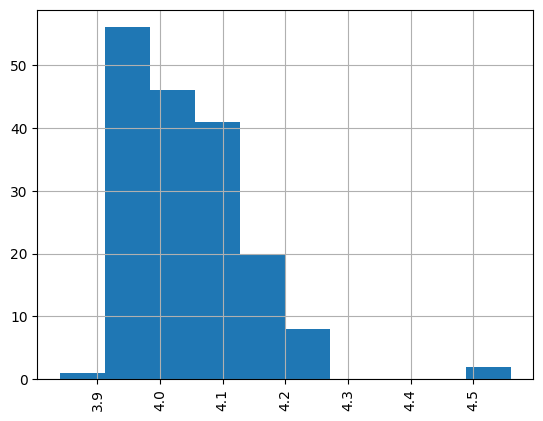

In [ ]:
df_rice['Price (Latest date)'].hist()
plt.xticks(rotation=90)

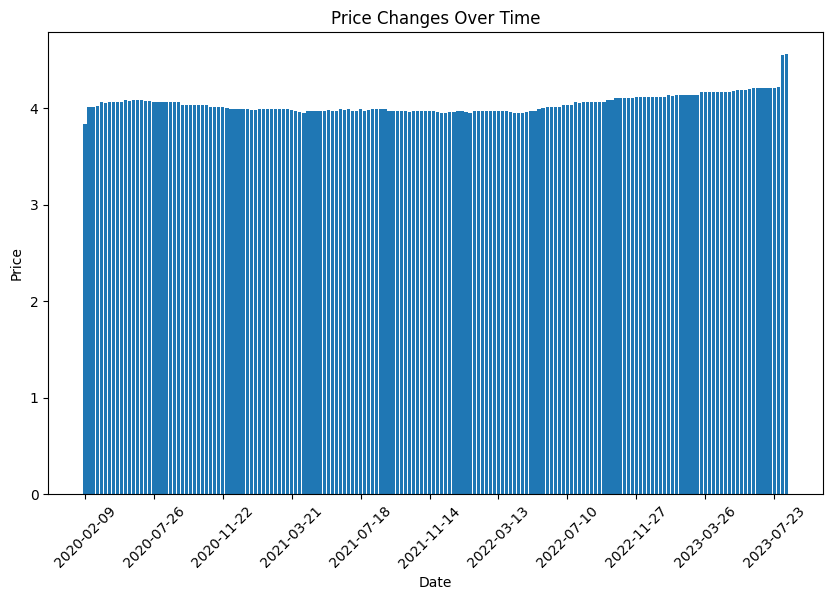

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_rice['Latest date'], df_rice['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

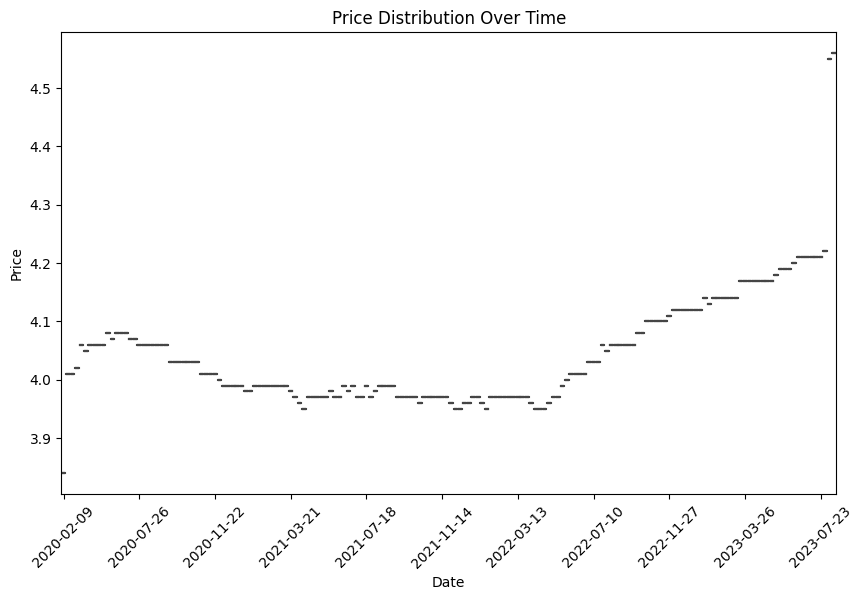

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_rice['Latest date'], y=df_rice['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_rice = df_rice.drop(columns=columns_to_drop)

In [ ]:
df_rice

,Country,Product,Price (Latest date),Latest date
0,United States,Rice (1kg),3.84,2020-02-09
1,United States,Rice (1kg),4.01,2020-04-05
2,United States,Rice (1kg),4.01,2020-04-12
3,United States,Rice (1kg),4.02,2020-04-19
4,United States,Rice (1kg),4.06,2020-04-26
...,...,...,...,...
170,United States,Rice (1kg),4.21,2023-07-16
171,United States,Rice (1kg),4.21,2023-07-23
172,United States,Rice (1kg),4.22,2023-07-30
173,United States,Rice (1kg),4.55,2023-08-06


In [ ]:
df_rice.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_rice.fillna(method='ffill',inplace=True)

In [ ]:
df_rice.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_rice = df_rice.iloc[1:]
df_rice

,Country,Product,Price (Latest date),Latest date
1,United States,Rice (1kg),4.01,2020-04-05
2,United States,Rice (1kg),4.01,2020-04-12
3,United States,Rice (1kg),4.02,2020-04-19
4,United States,Rice (1kg),4.06,2020-04-26
5,United States,Rice (1kg),4.05,2020-05-03
...,...,...,...,...
170,United States,Rice (1kg),4.21,2023-07-16
171,United States,Rice (1kg),4.21,2023-07-23
172,United States,Rice (1kg),4.22,2023-07-30
173,United States,Rice (1kg),4.55,2023-08-06


In [ ]:
for i in range(1, 4):
    df_rice[f'Price {i} week(s) ago'] = df_rice['Price (Latest date)'].shift(i)

<ipython-input-363-10fae475faa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice[f'Price {i} week(s) ago'] = df_rice['Price (Latest date)'].shift(i)
<ipython-input-363-10fae475faa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rice[f'Price {i} week(s) ago'] = df_rice['Price (Latest date)'].shift(i)
<ipython-input-363-10fae475faa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
df_rice

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,Rice (1kg),4.01,2020-04-05,NaN,NaN,NaN
2,United States,Rice (1kg),4.01,2020-04-12,4.01,NaN,NaN
3,United States,Rice (1kg),4.02,2020-04-19,4.01,4.01,NaN
4,United States,Rice (1kg),4.06,2020-04-26,4.02,4.01,4.01
5,United States,Rice (1kg),4.05,2020-05-03,4.06,4.02,4.01
...,...,...,...,...,...,...,...
170,United States,Rice (1kg),4.21,2023-07-16,4.21,4.21,4.21
171,United States,Rice (1kg),4.21,2023-07-23,4.21,4.21,4.21
172,United States,Rice (1kg),4.22,2023-07-30,4.21,4.21,4.21
173,United States,Rice (1kg),4.55,2023-08-06,4.22,4.21,4.21


In [ ]:
df_rice = df_rice.dropna().reset_index(drop=True)

In [ ]:
df_rice

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,Rice (1kg),4.06,2020-04-26,4.02,4.01,4.01
1,United States,Rice (1kg),4.05,2020-05-03,4.06,4.02,4.01
2,United States,Rice (1kg),4.06,2020-05-10,4.05,4.06,4.02
3,United States,Rice (1kg),4.06,2020-05-17,4.06,4.05,4.06
4,United States,Rice (1kg),4.06,2020-05-24,4.06,4.06,4.05
...,...,...,...,...,...,...,...
166,United States,Rice (1kg),4.21,2023-07-16,4.21,4.21,4.21
167,United States,Rice (1kg),4.21,2023-07-23,4.21,4.21,4.21
168,United States,Rice (1kg),4.22,2023-07-30,4.21,4.21,4.21
169,United States,Rice (1kg),4.55,2023-08-06,4.22,4.21,4.21


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_rice[df_rice.columns[4:]],  df_rice['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
48,3.98,3.99,3.99
73,3.97,3.99,3.99
129,4.10,4.08,4.08
123,4.06,4.06,4.06
141,4.12,4.12,4.12
...,...,...,...
2,4.05,4.06,4.02
45,3.99,3.99,3.99
132,4.10,4.10,4.10
166,4.21,4.21,4.21


In [ ]:
Y_train

48     3.97
73     3.97
129    4.10
123    4.06
141    4.14
       ... 
2      4.06
45     3.99
132    4.10
166    4.21
161    4.20
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9161828193327645


In [ ]:
model.coef_

array([0.08912933, 0.00314135, 0.00372993])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 4.049338235294117


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([3.96668903, 3.94690313, 3.96933016, 3.98967979, 4.08652898,
       4.06586271, 3.95811665, 3.98791904, 4.06489997, 4.06538134,
       3.95859801, 3.95811665, 4.03117706, 4.18434091, 4.06137846,
       3.94778351, 4.13026838, 3.96805078, 4.0113088 , 4.06538134,
       4.10863936, 4.01082744, 4.15141602, 4.06538134, 3.94690313,
       3.9671704 , 4.18434091, 4.03293782, 3.98967979, 3.97974566,
       4.06538134, 4.06274021, 3.96805078, 4.13026838, 3.96805078])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.007530303327692385
Mean Squared Error: 9.109972424926748e-05
Root Mean Squared Error: 0.009544617553850311
R-squared: 0.978034649016779


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.006081859410430735
Mean Squared Error: 8.536326350645933e-05
Root Mean Squared Error: 0.009239224183147595
R-squared: 0.9794177857348713


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 100)            41600     
                                                                 
 lstm_17 (LSTM)              (None, 64)                42240     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 2s 51ms/step - loss: 16.3280 - mean_absolute_error: 4.0394 - val_loss: 16.1450 - val_mean_absolute_error: 4.0173
Epoch 2/200
7/7 [==============================] - 0s 10ms/step - loss: 16.0945 - mean_absolute_error: 4.0104 - val_loss: 15.9074 - val_mean_absolute_error: 3.9876
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 15.8183 - mean_absolute_error: 3.9759 - val_loss: 15.5883 - val_mean_absolute_error: 3.9473
Epoch 4/200
7/7 [==============================] - 0s 8ms/step - loss: 15.4376 - mean_absolute_error: 3.9277 - val_loss: 15.1512 - val_mean_absolute_error: 3.8913
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 14.9096 - mean_absolute_error: 3.8598 - val_loss: 14.5422 - val_mean_absolute_error: 3.8117
Epoch 6/200
7/7 [==============================] - 0s 8ms/step - loss: 14.1626 - mean_absolute_error: 3.7612 - val_loss: 13.6803 - val_mean_absolute_error: 3.6956
Epoch 7/200
7/7 [==

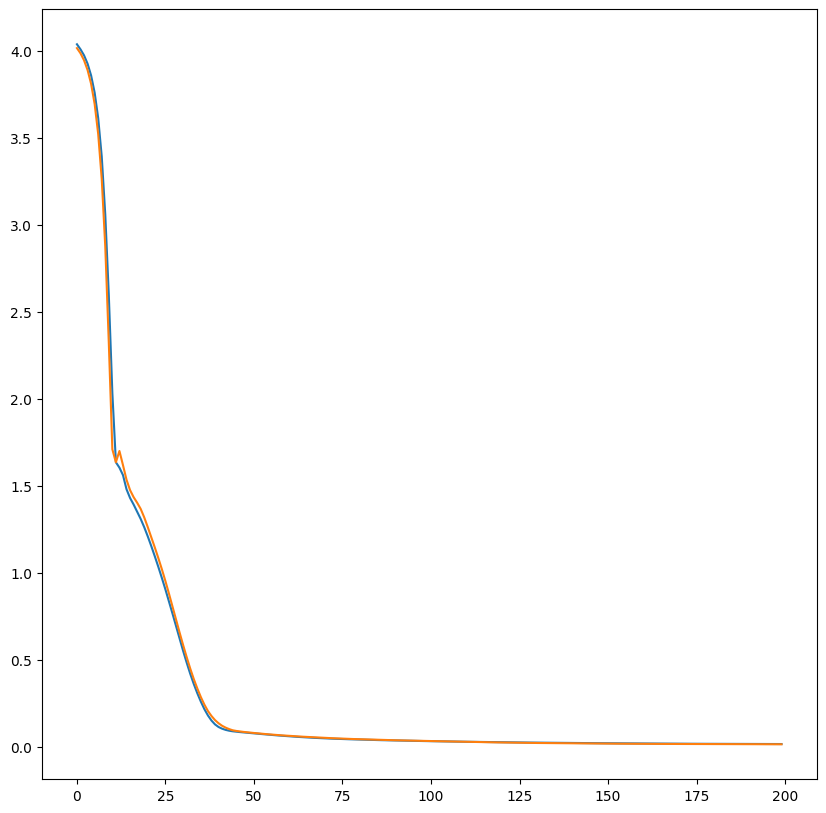

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 5ms/step


In [ ]:
y_pred

array([[3.9821115],
       [3.971394 ],
       [3.9647431],
       [3.978993 ],
       [4.0745597],
       [4.073949 ],
       [3.9624782],
       [3.983821 ],
       [4.070211 ],
       [4.072104 ],
       [3.9612026],
       [3.9624782],
       [4.0206456],
       [4.1807146],
       [4.045865 ],
       [3.960027 ],
       [4.126615 ],
       [3.9695134],
       [4.004216 ],
       [4.072104 ],
       [4.077688 ],
       [4.000282 ],
       [4.145437 ],
       [4.072104 ],
       [3.971394 ],
       [3.975207 ],
       [4.1807146],
       [4.037434 ],
       [3.978993 ],
       [3.971402 ],
       [4.072104 ],
       [4.0541973],
       [3.9695137],
       [4.126615 ],
       [3.9695134]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.009693441118512907
Mean Squared Error: 0.00012416290153299329
Root Mean Squared Error: 0.011142840819691956
R-squared: 0.9700626787430782


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.978034649016779
R-squared decision tree regressor:  0.9794177857348713
R-squared neural networkk:  0.9700626787430782


#***10. Tomatoes Dataset***

In [ ]:
df_tomatoes=pd.read_csv('/content/drive/MyDrive/IDS_PROJECT/datasets/Daily Food Prices Monitor - FAO DataLab - Tomatoes.csv')

In [ ]:
df_tomatoes

,Country,ISO3,Product,Baseline (14 Feb 2020),Price (Latest date),Variation,Currency,Range,Latest date
0,United States,USA,Tomatoes (1kg),4.04,4.04,NaN,$,2.2-6.61,2020-02-09
1,United States,USA,Tomatoes (1kg),4.04,4.28,5.94,$,2.18-7.69,2020-04-05
2,United States,USA,Tomatoes (1kg),4.04,4.28,5.94,$,2.18-7.69,2020-04-12
3,United States,USA,Tomatoes (1kg),4.04,4.28,5.83,$,2.18-7.69,2020-04-19
4,United States,USA,Tomatoes (1kg),4.04,4.28,5.94,$,2.18-7.69,2020-04-26
...,...,...,...,...,...,...,...,...,...
170,United States,USA,Tomatoes (1kg),4.04,4.61,14.11,$,0.89-3.79,2023-07-16
171,United States,USA,Tomatoes (1kg),4.04,4.61,14.11,$,0.89-3.79,2023-07-23
172,United States,USA,Tomatoes (1kg),4.04,4.61,14.11,$,0.89-3.80,2023-07-30
173,United States,USA,Tomatoes (1kg),4.04,4.61,14.11,$,0.89-3.80,2023-08-06


# Data Analysis and Visualization

In [ ]:
df_tomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 175 non-null    object 
 1   ISO3                    175 non-null    object 
 2   Product                 175 non-null    object 
 3   Baseline (14 Feb 2020)  175 non-null    float64
 4   Price (Latest date)     174 non-null    float64
 5   Variation               173 non-null    float64
 6   Currency                174 non-null    object 
 7   Range                   174 non-null    object 
 8   Latest date             175 non-null    object 
dtypes: float64(3), object(6)
memory usage: 12.4+ KB


In [ ]:
stats = df_tomatoes.describe(include='all')
print(stats)

              Country ISO3         Product  Baseline (14 Feb 2020)  \
count             175  175             175            1.750000e+02   
unique              1    1               1                     NaN   
top     United States  USA  Tomatoes (1kg)                     NaN   
freq              175  175             175                     NaN   
mean              NaN  NaN             NaN            4.040000e+00   
std               NaN  NaN             NaN            8.907270e-16   
min               NaN  NaN             NaN            4.040000e+00   
25%               NaN  NaN             NaN            4.040000e+00   
50%               NaN  NaN             NaN            4.040000e+00   
75%               NaN  NaN             NaN            4.040000e+00   
max               NaN  NaN             NaN            4.040000e+00   

        Price (Latest date)   Variation Currency      Range Latest date  
count            174.000000  173.000000      174        174         175  
unique     

(array([4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7]),
 [Text(4.0, 0, '4.0'),
  Text(4.1, 0, '4.1'),
  Text(4.2, 0, '4.2'),
  Text(4.3, 0, '4.3'),
  Text(4.4, 0, '4.4'),
  Text(4.5, 0, '4.5'),
  Text(4.6, 0, '4.6'),
  Text(4.7, 0, '4.7')])

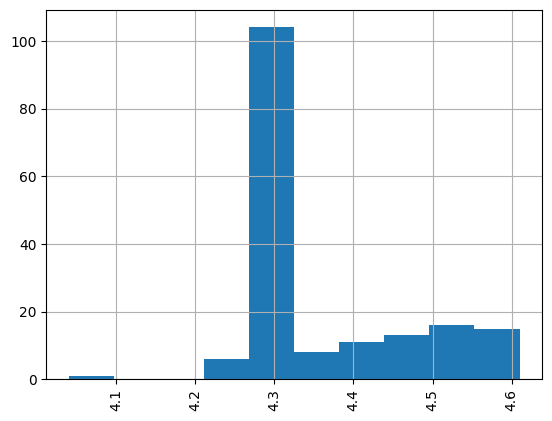

In [ ]:
df_tomatoes['Price (Latest date)'].hist()
plt.xticks(rotation=90)

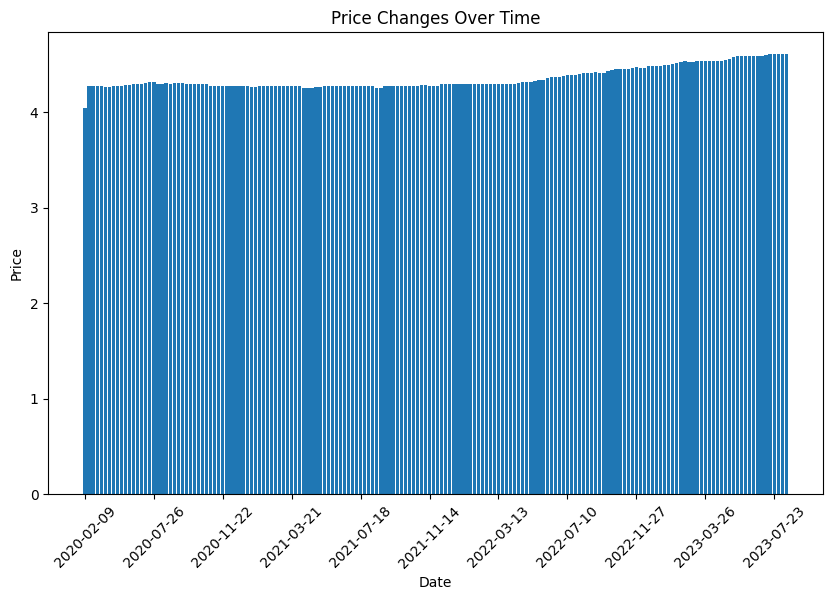

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_tomatoes['Latest date'], df_tomatoes['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Changes Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

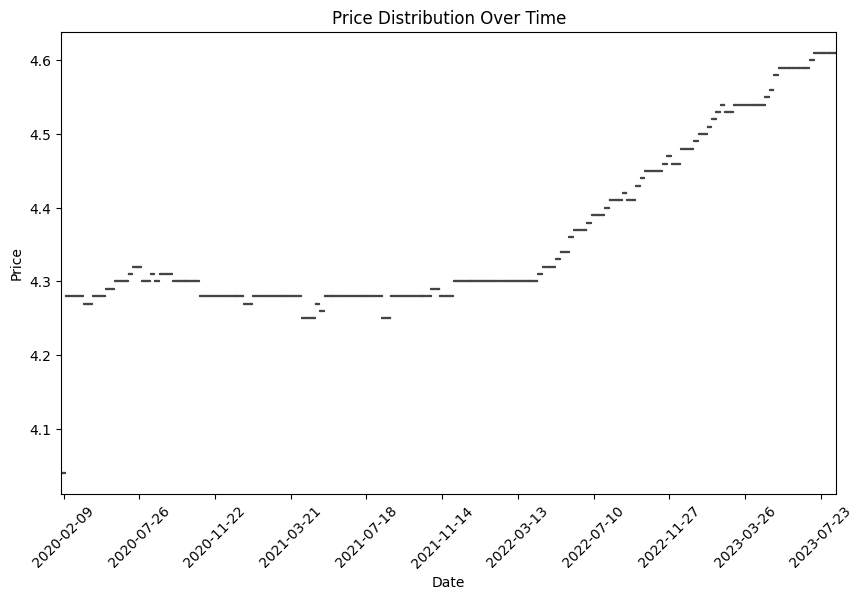

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_tomatoes['Latest date'], y=df_tomatoes['Price (Latest date)'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Distribution Over Time')
plt.xticks(rotation=45)

num_ticks = 10
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks[::len(x_ticks)//num_ticks], rotation=45)

plt.show()

# Data preparation

In [ ]:
columns_to_drop = ['ISO3', 'Baseline (14 Feb 2020)', 'Currency', 'Variation', 'Range']
df_tomatoes = df_tomatoes.drop(columns=columns_to_drop)

In [ ]:
df_tomatoes

,Country,Product,Price (Latest date),Latest date
0,United States,Tomatoes (1kg),4.04,2020-02-09
1,United States,Tomatoes (1kg),4.28,2020-04-05
2,United States,Tomatoes (1kg),4.28,2020-04-12
3,United States,Tomatoes (1kg),4.28,2020-04-19
4,United States,Tomatoes (1kg),4.28,2020-04-26
...,...,...,...,...
170,United States,Tomatoes (1kg),4.61,2023-07-16
171,United States,Tomatoes (1kg),4.61,2023-07-23
172,United States,Tomatoes (1kg),4.61,2023-07-30
173,United States,Tomatoes (1kg),4.61,2023-08-06


In [ ]:
df_tomatoes.isnull().sum()

Country                0
Product                0
Price (Latest date)    1
Latest date            0
dtype: int64

In [ ]:
df_tomatoes.fillna(method='ffill',inplace=True)

In [ ]:
df_tomatoes.isnull().sum()

Country                0
Product                0
Price (Latest date)    0
Latest date            0
dtype: int64

In [ ]:
df_tomatoes = df_tomatoes.iloc[1:]
df_tomatoes

,Country,Product,Price (Latest date),Latest date
1,United States,Tomatoes (1kg),4.28,2020-04-05
2,United States,Tomatoes (1kg),4.28,2020-04-12
3,United States,Tomatoes (1kg),4.28,2020-04-19
4,United States,Tomatoes (1kg),4.28,2020-04-26
5,United States,Tomatoes (1kg),4.27,2020-05-03
...,...,...,...,...
170,United States,Tomatoes (1kg),4.61,2023-07-16
171,United States,Tomatoes (1kg),4.61,2023-07-23
172,United States,Tomatoes (1kg),4.61,2023-07-30
173,United States,Tomatoes (1kg),4.61,2023-08-06


In [ ]:
for i in range(1, 4):
    df_tomatoes[f'Price {i} week(s) ago'] = df_tomatoes['Price (Latest date)'].shift(i)

<ipython-input-406-d54ef6098e6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomatoes[f'Price {i} week(s) ago'] = df_tomatoes['Price (Latest date)'].shift(i)
<ipython-input-406-d54ef6098e6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tomatoes[f'Price {i} week(s) ago'] = df_tomatoes['Price (Latest date)'].shift(i)
<ipython-input-406-d54ef6098e6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
df_tomatoes

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
1,United States,Tomatoes (1kg),4.28,2020-04-05,NaN,NaN,NaN
2,United States,Tomatoes (1kg),4.28,2020-04-12,4.28,NaN,NaN
3,United States,Tomatoes (1kg),4.28,2020-04-19,4.28,4.28,NaN
4,United States,Tomatoes (1kg),4.28,2020-04-26,4.28,4.28,4.28
5,United States,Tomatoes (1kg),4.27,2020-05-03,4.28,4.28,4.28
...,...,...,...,...,...,...,...
170,United States,Tomatoes (1kg),4.61,2023-07-16,4.60,4.59,4.59
171,United States,Tomatoes (1kg),4.61,2023-07-23,4.61,4.60,4.59
172,United States,Tomatoes (1kg),4.61,2023-07-30,4.61,4.61,4.60
173,United States,Tomatoes (1kg),4.61,2023-08-06,4.61,4.61,4.61


In [ ]:
df_tomatoes = df_tomatoes.dropna().reset_index(drop=True)

In [ ]:
df_tomatoes

,Country,Product,Price (Latest date),Latest date,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
0,United States,Tomatoes (1kg),4.28,2020-04-26,4.28,4.28,4.28
1,United States,Tomatoes (1kg),4.27,2020-05-03,4.28,4.28,4.28
2,United States,Tomatoes (1kg),4.27,2020-05-10,4.27,4.28,4.28
3,United States,Tomatoes (1kg),4.28,2020-05-17,4.27,4.27,4.28
4,United States,Tomatoes (1kg),4.28,2020-05-24,4.28,4.27,4.27
...,...,...,...,...,...,...,...
166,United States,Tomatoes (1kg),4.61,2023-07-16,4.60,4.59,4.59
167,United States,Tomatoes (1kg),4.61,2023-07-23,4.61,4.60,4.59
168,United States,Tomatoes (1kg),4.61,2023-07-30,4.61,4.61,4.60
169,United States,Tomatoes (1kg),4.61,2023-08-06,4.61,4.61,4.61


# Dividing into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_tomatoes[df_tomatoes.columns[4:]],  df_tomatoes['Price (Latest date)'], test_size=0.2)

In [ ]:
X_train

,Price 1 week(s) ago,Price 2 week(s) ago,Price 3 week(s) ago
130,4.45,4.45,4.44
27,4.30,4.30,4.30
122,4.41,4.41,4.40
107,4.32,4.32,4.31
115,4.37,4.37,4.37
...,...,...,...
101,4.30,4.30,4.30
45,4.28,4.28,4.28
149,4.54,4.53,4.53
152,4.54,4.54,4.54


In [ ]:
Y_train

130    4.45
27     4.28
122    4.41
107    4.32
115    4.38
       ... 
101    4.30
45     4.28
149    4.54
152    4.54
70     4.25
Name: Price (Latest date), Length: 136, dtype: float64

# Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Model 1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, Y_train)

In [ ]:
r_sq = model.score(X_train, Y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9949889618540497


In [ ]:
model.coef_

array([ 0.11417277, -0.03224196,  0.02830299])

In [ ]:
print('Intercept:', model.intercept_)

Intercept: 4.359044117647058


In [ ]:
Y_pred_lin = model.predict(X_test)
Y_pred_lin

array([4.51538426, 4.28865595, 4.30116985, 4.28116375, 4.49504613,
       4.28116375, 4.28116375, 4.28116375, 4.59640475, 4.42386268,
       4.28116375, 4.28116375, 4.28116375, 4.59640475, 4.5022063 ,
       4.28116375, 4.2804997 , 4.47203114, 4.28116375, 4.52287646,
       4.45169301, 4.28116375, 4.30150187, 4.30150187, 4.31200296,
       4.31467983, 4.41101675, 4.46119802, 4.4103527 , 4.61406602,
       4.30150187, 4.30150187, 4.31200296, 4.39067862, 4.30150187])

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_lin)
mse = mean_squared_error(Y_test, Y_pred_lin)
rmse = mean_squared_error(Y_test, Y_pred_lin, squared=False)

r2_lin = r2_score(Y_test, Y_pred_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_lin)

Mean Absolute Error: 0.0035722740125799443
Mean Squared Error: 2.5819477747824043e-05
Root Mean Squared Error: 0.005081287016871222
R-squared: 0.9977339327505385


# **Model 2 - Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

Y_pred_tree = regressor.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred_tree)
mse = mean_squared_error(Y_test, Y_pred_tree)
rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)

r2_tree = r2_score(Y_test, Y_pred_tree)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_tree)

Mean Absolute Error: 0.005727422003284158
Mean Squared Error: 8.689277692845224e-05
Root Mean Squared Error: 0.009321629521089767
R-squared: 0.9923737854833672


# **Model 3 - Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [ ]:
X_train.shape


(136, 3)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train.shape


(136, 1, 3)

In [ ]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [ ]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 100)            41600     
                                                                 
 lstm_19 (LSTM)              (None, 64)                42240     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


In [ ]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=200, batch_size=16)


Epoch 1/200
7/7 [==============================] - 2s 52ms/step - loss: 18.9420 - mean_absolute_error: 4.3509 - val_loss: 18.7270 - val_mean_absolute_error: 4.3263
Epoch 2/200
7/7 [==============================] - 0s 7ms/step - loss: 18.7288 - mean_absolute_error: 4.3265 - val_loss: 18.4950 - val_mean_absolute_error: 4.2995
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 18.4620 - mean_absolute_error: 4.2957 - val_loss: 18.1856 - val_mean_absolute_error: 4.2635
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 18.1078 - mean_absolute_error: 4.2545 - val_loss: 17.7721 - val_mean_absolute_error: 4.2148
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 17.6230 - mean_absolute_error: 4.1973 - val_loss: 17.1988 - val_mean_absolute_error: 4.1464
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 16.9410 - mean_absolute_error: 4.1153 - val_loss: 16.3895 - val_mean_absolute_error: 4.0476
Epoch 7/200
7/7 [===

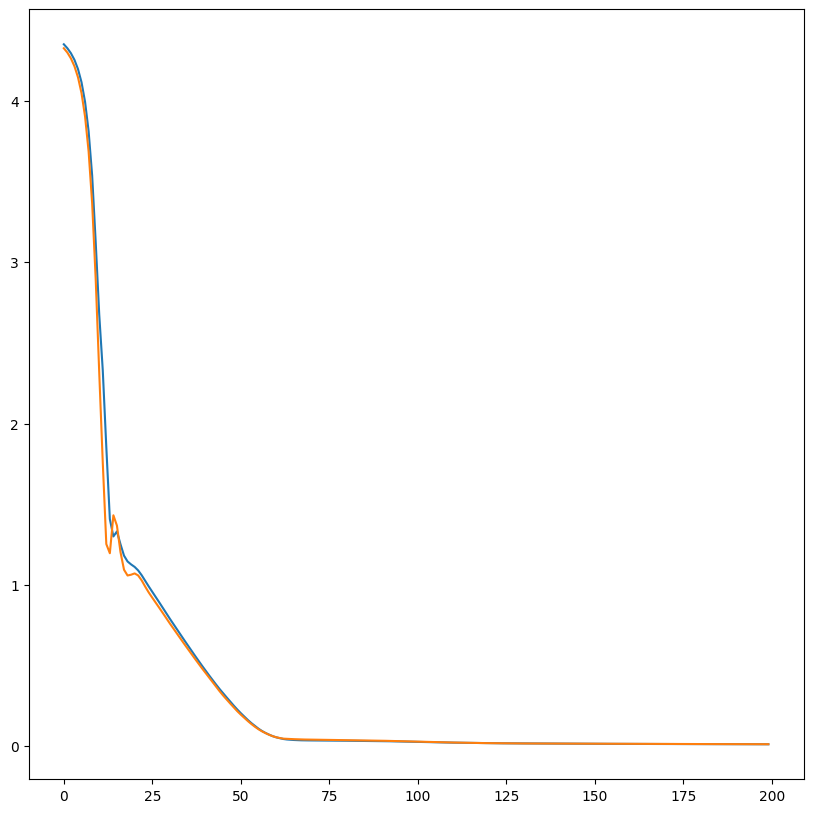

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
y_pred = model.predict(X_test)


2/2 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([[4.543809 ],
       [4.284717 ],
       [4.2992954],
       [4.278869 ],
       [4.513774 ],
       [4.278869 ],
       [4.278869 ],
       [4.278869 ],
       [4.589444 ],
       [4.379607 ],
       [4.278869 ],
       [4.278869 ],
       [4.278869 ],
       [4.589444 ],
       [4.535987 ],
       [4.278869 ],
       [4.2872825],
       [4.4644175],
       [4.278869 ],
       [4.549987 ],
       [4.3987584],
       [4.278869 ],
       [4.2976084],
       [4.2976084],
       [4.3027544],
       [4.3059154],
       [4.390563 ],
       [4.4695654],
       [4.369753 ],
       [4.618275 ],
       [4.2976074],
       [4.2976074],
       [4.3027544],
       [4.4140425],
       [4.2976074]], dtype=float32)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)

r2_nn = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2_nn)

Mean Absolute Error: 0.010211500440325112
Mean Squared Error: 0.00025933088906062796
Root Mean Squared Error: 0.016103753881025005
R-squared: 0.9772396157577757


# Comparison between the models

In [ ]:
print("R-squared linear regression: ", r2_lin)
print("R-squared decision tree regressor: ", r2_tree)
print("R-squared neural networkk: ", r2_nn)

R-squared linear regression:  0.9977339327505385
R-squared decision tree regressor:  0.9923737854833672
R-squared neural networkk:  0.9772396157577757
